# Assignment 7
by Anchalee P Ramirez

In [1]:
from sklearn.svm import LinearSVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
import numpy as np

from sklearn.linear_model import LogisticRegression as Model

Read in the Kobe Bryant shooting data [https://www.kaggle.com/c/kobe-bryant-shot-selection]

In [2]:
kobe = pd.read_csv('C:/Users/Anchee/Desktop/MS Government Analytics JHU/Fall 2018 - Machine Learning and Neural Networks/mlnn-master/data/kobe.csv')
kobe.dropna(inplace=True)

In [3]:
list(kobe.columns)

['action_type',
 'combined_shot_type',
 'game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'season',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'shot_type',
 'shot_zone_area',
 'shot_zone_basic',
 'shot_zone_range',
 'team_id',
 'team_name',
 'game_date',
 'matchup',
 'opponent',
 'shot_id']

For now, use just the numerical datatypes. They are below as `num_columns`

In [4]:
kobe.shot_zone_area.value_counts()

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64

In [5]:
kobe.shot_zone_range.value_counts()

Less Than 8 ft.    7857
16-24 ft.          6907
8-16 ft.           5580
24+ ft.            5281
Back Court Shot      72
Name: shot_zone_range, dtype: int64

In [6]:
kobe.shot_zone_basic.value_counts()

Mid-Range                10532
Restricted Area           5932
Above the Break 3         4720
In The Paint (Non-RA)     3880
Right Corner 3             333
Left Corner 3              240
Backcourt                   60
Name: shot_zone_basic, dtype: int64

In [7]:
kobe

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10
10,Jump Shot,Jump Shot,309,20000012,33.8063,-94,238,-118.3638,1,3,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,11
11,Jump Shot,Jump Shot,4,20000019,33.9173,121,127,-118.1488,11,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,12


In [8]:
kobe.shot_made_flag.value_counts(normalize=True)

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

In [9]:
kobe.shot_made_flag.value_counts(normalize=False)

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

In [10]:
num_columns = [col for col, dtype in zip(kobe.columns, kobe.dtypes) if dtype != 'object']
num_columns

['game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'team_id',
 'shot_id']

## The `shot_made_flag` is the result (0 or 1) of the shot that Kobe took. Some of the values are missing (e.g. `NaN`) but we *_dropped_* them.

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

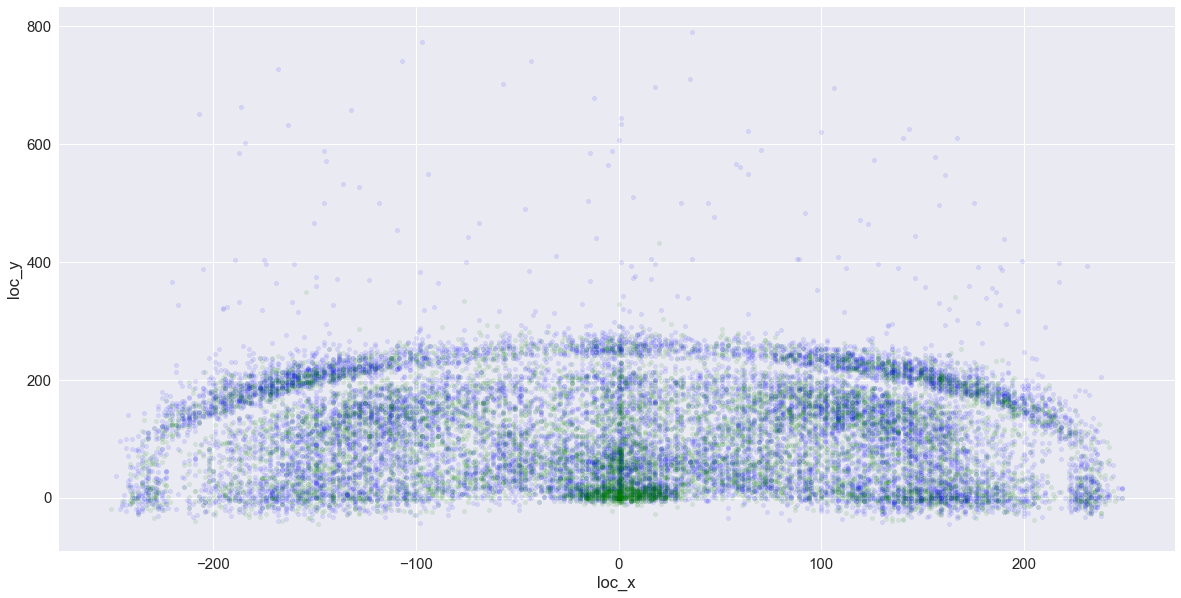

In [12]:
fig, ax = plt.subplots()
kobe[kobe.shot_made_flag==0].plot(kind='scatter', x='loc_x', y='loc_y', color='blue', alpha=0.1, ax=ax)
kobe[kobe.shot_made_flag==1].plot(kind='scatter', x='loc_x', y='loc_y', color='green', alpha=0.1, ax=ax)
# plt.scatter(kobe.loc_x, kobe.loc_y, alpha=0.2)

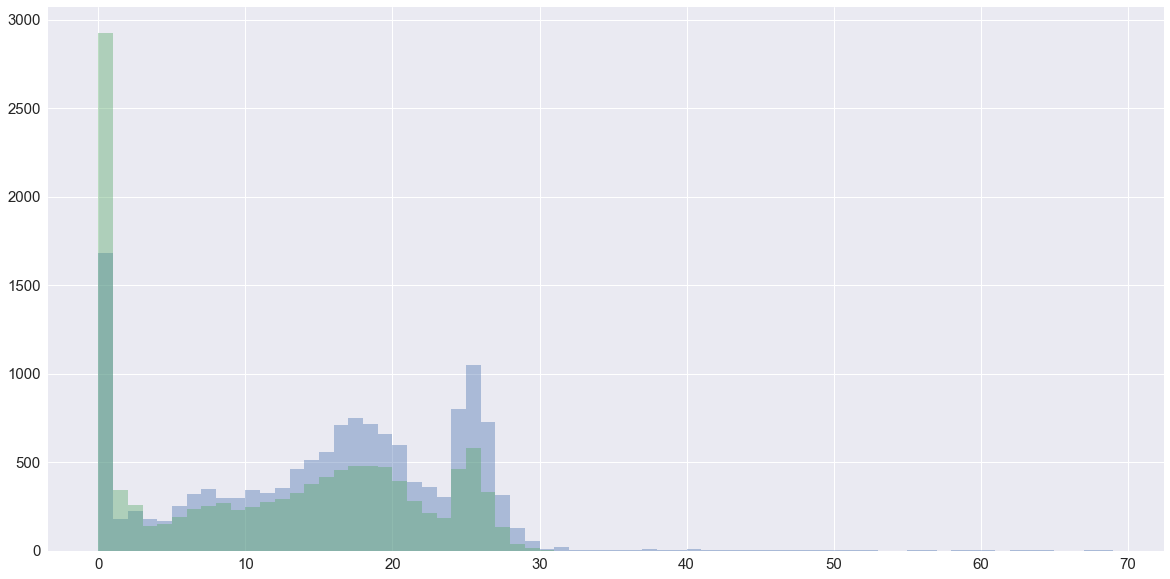

In [13]:
kobe[kobe.shot_made_flag==0].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[kobe.shot_made_flag==1].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

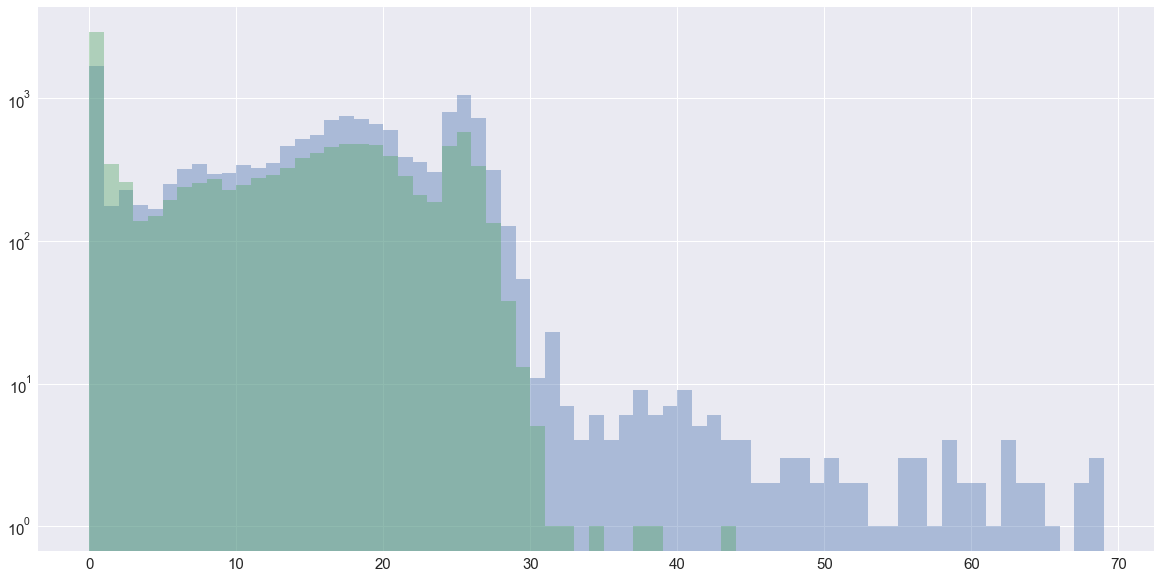

In [14]:
kobe[kobe.shot_made_flag==0].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4, log=True)
kobe[kobe.shot_made_flag==1].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4, log=True)

In [15]:
# fit a linear regression model and store the predictions
feature_cols = ['shot_distance', 'minutes_remaining']
X = kobe[feature_cols]
y = kobe.shot_made_flag

model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())


0.5971903335019653

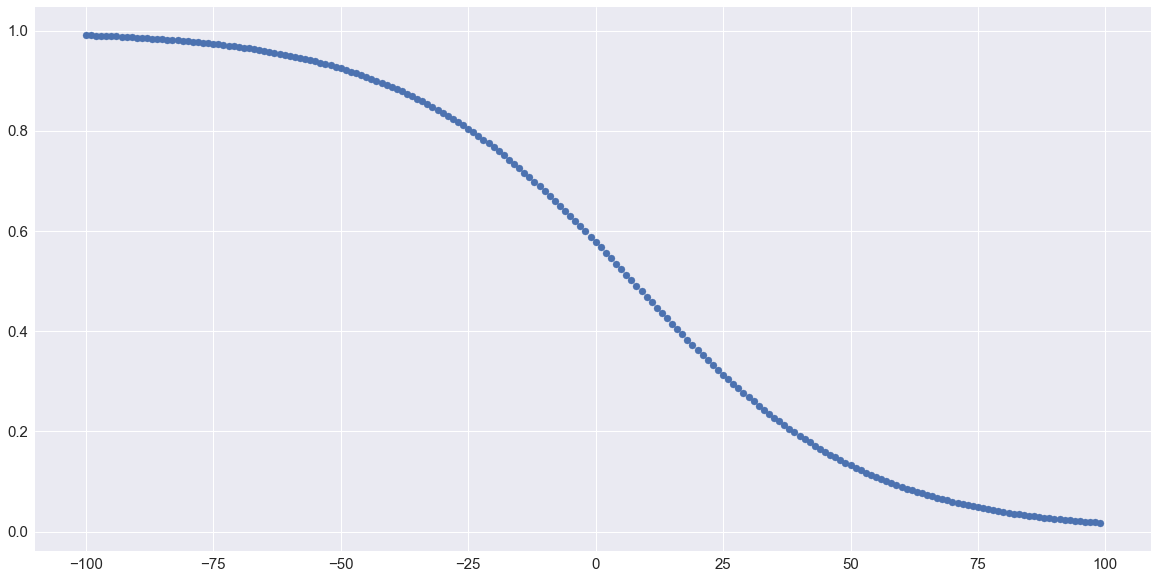

In [16]:
distances = np.arange(-100, 100)
minutes = np.array([0]*200)
x_trial = np.column_stack((distances, minutes))
model.predict_proba(x_trial)
plt.scatter(distances, model.predict_proba(x_trial)[:,1])

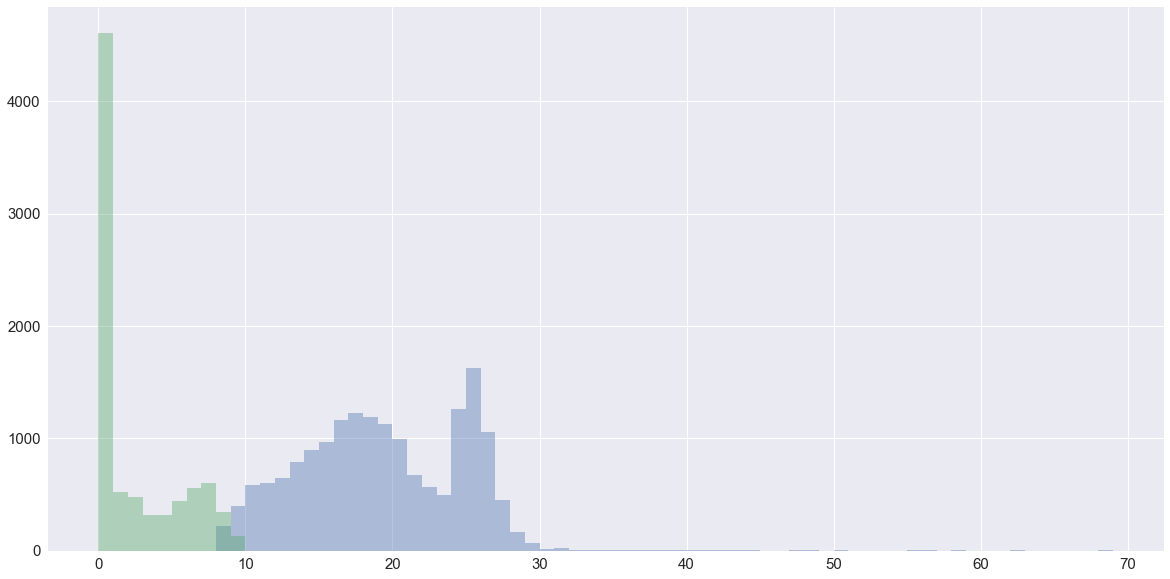

In [17]:
kobe[(kobe.pred==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

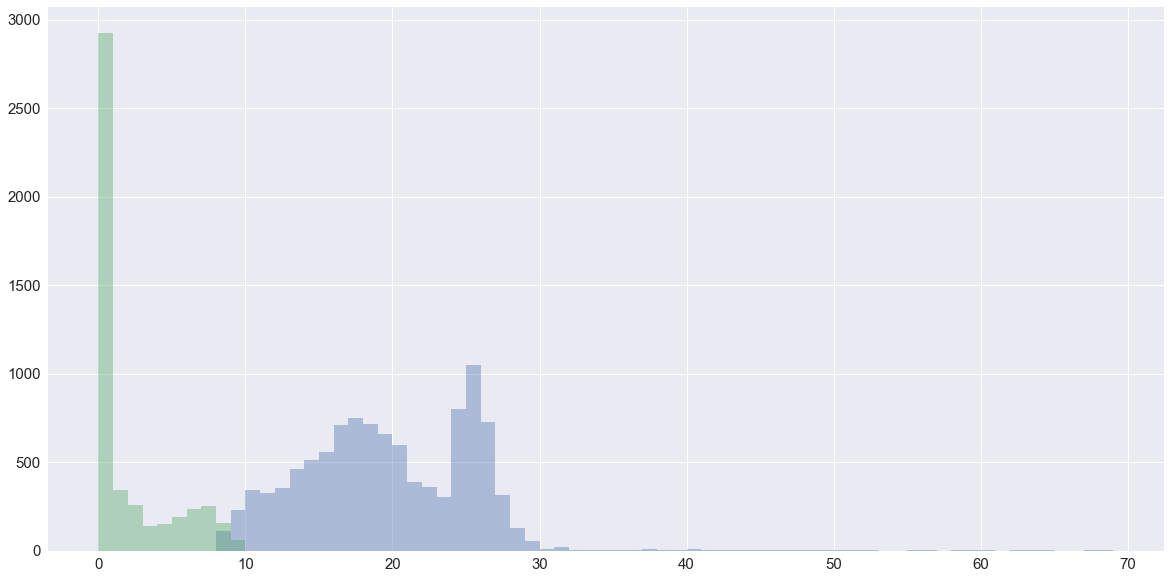

In [18]:
kobe[(kobe.pred==0) & (kobe.shot_made_flag==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1) & (kobe.shot_made_flag==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

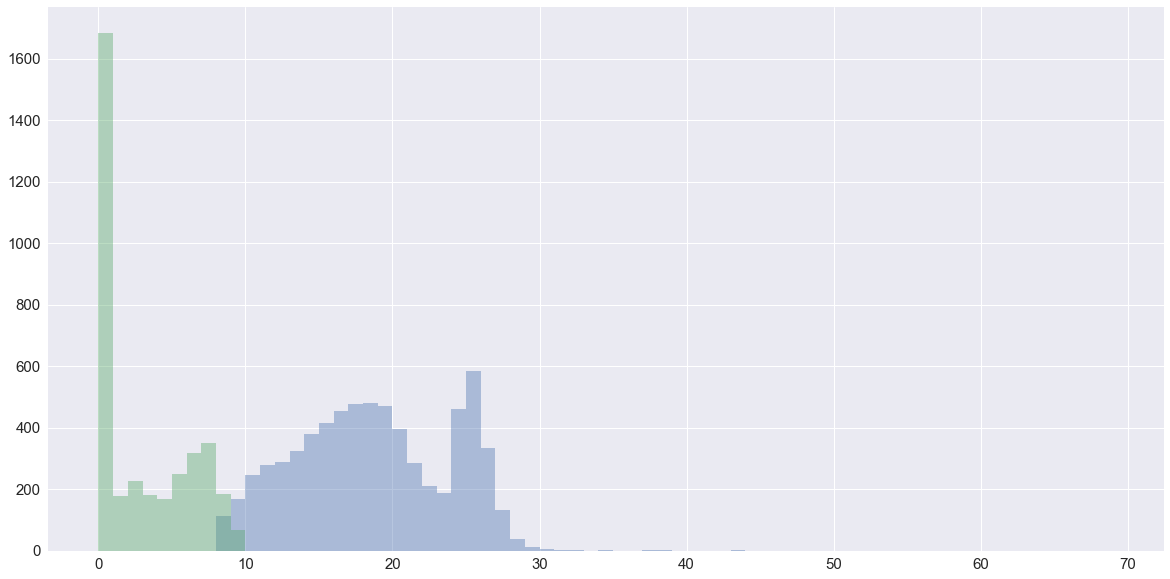

In [19]:
kobe[(kobe.pred==0) & (kobe.shot_made_flag==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1) & (kobe.shot_made_flag==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

Text(0,0.5,'made')

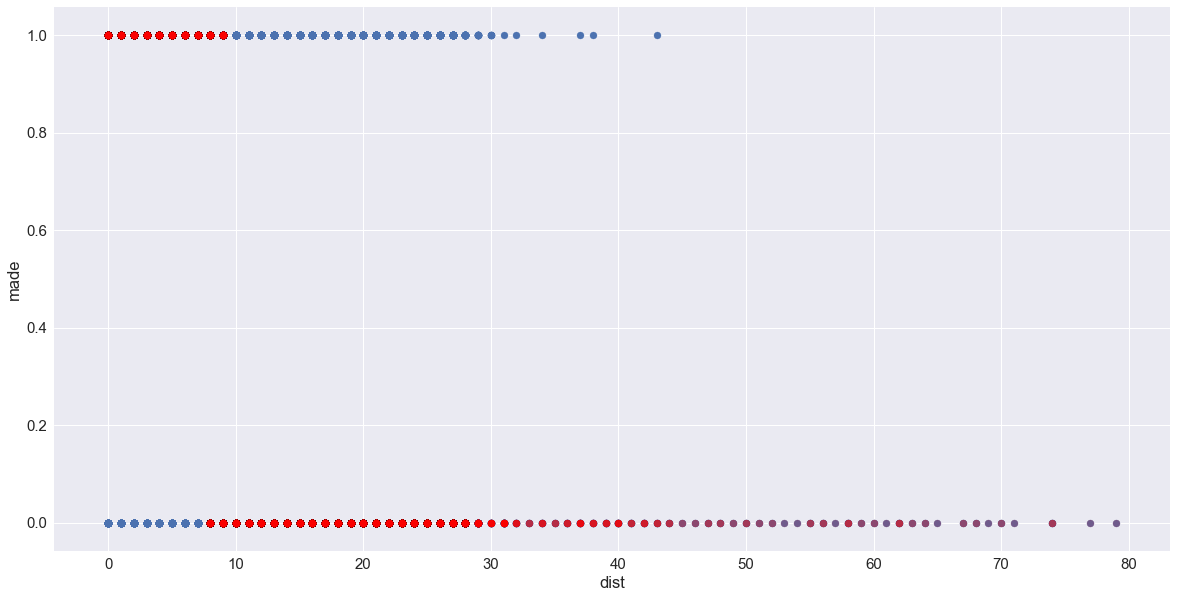

In [20]:
# scatter plot that includes the regression line
plt.scatter(kobe.shot_distance, kobe.shot_made_flag)
plt.scatter(kobe.shot_distance, kobe.pred, color='red', alpha=.2)
plt.xlabel('dist')
plt.ylabel('made')

## The following is a reminder of how the SciKit-Learn Models can be interfaced

In [21]:
from sklearn.linear_model import LogisticRegression as Model
# from sklearn.tree import DecisionTreeClassifier as Model
# from sklearn.ensemble import RandomForestClassifier as Model
model = Model()

from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )
from sklearn.metrics import *
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.4, random_state=0)

cross_validation.cross_val_score(model, X, y, cv=10)


C:\Users\Anchee\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([0.59237651, 0.59354337, 0.59299611, 0.59688716, 0.61750973,
       0.58388478, 0.60334761, 0.60918645, 0.60140132, 0.58388478])

# Assignment

## Warmup. Perform some analysis on Kobe's shot selection. Ask and answer (with charts) questions such as: Does Kobe make more shots in the 4th quarter than on average? Does Kobe make more shots from the left more than the right? What was Kobe's best year for shooting percentage? Etc. The more naunced the more you'll have a feel for the data.

 ### (a) Does Kobe make more shots in the 4th quarter than on average?

In [22]:
kobe.period.value_counts()

3    7002
1    6700
4    6043
2    5635
5     280
6      30
7       7
Name: period, dtype: int64

According to `kobe.period`, we can see that Kobe made more shots in the 3rd period.

### (b) Does Kobe make more shots from the left more than the right?

In [23]:
kobe.shot_zone_area.value_counts(normalize = True)

Center(C)                0.439312
Right Side Center(RC)    0.154921
Right Side(R)            0.150173
Left Side Center(LC)     0.130910
Left Side(L)             0.121882
Back Court(BC)           0.002802
Name: shot_zone_area, dtype: float64

In [24]:
kobe.shot_zone_area.value_counts(normalize = False)

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64

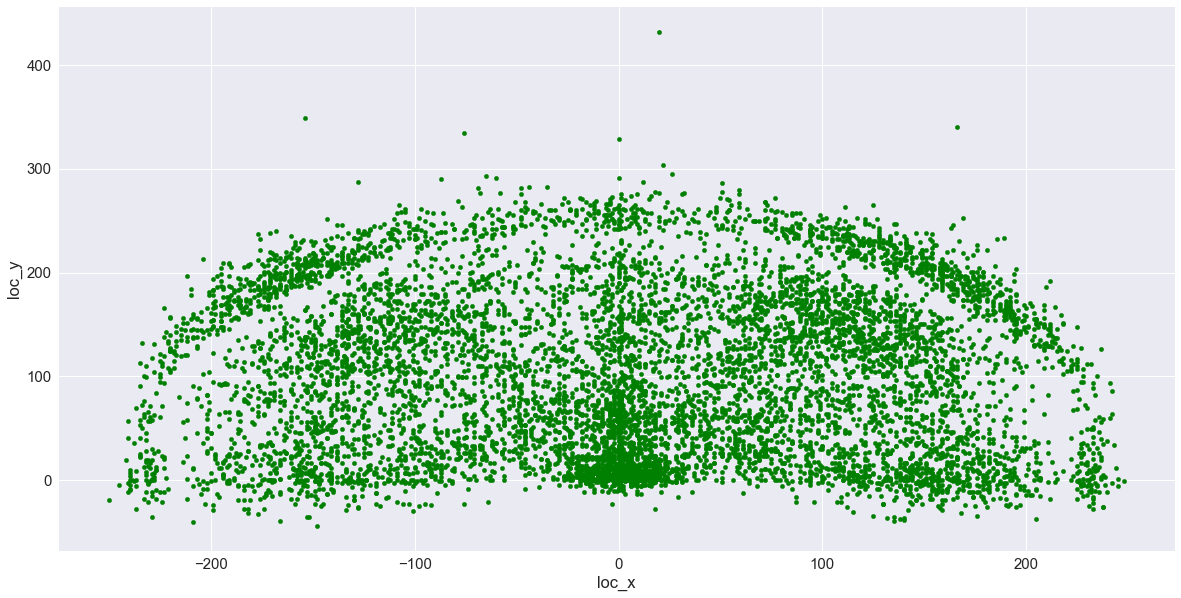

In [25]:
fig, ax = plt.subplots()
kobe[kobe.shot_made_flag == 1].plot(kind = 'scatter', x = 'loc_x', y = 'loc_y', color = 'green',ax = ax)

Kobe made shots both from left and right equally. We can see from the Scatter plot above. However, the shots from the right side were slightly more than the shots from the left side.

### (c) What was Kobe's best year for shooting percentage?

In [26]:
kobe.season.value_counts(normalize = True)

2005-06    0.074873
2002-03    0.072071
2008-09    0.072032
2007-08    0.070786
2009-10    0.068957
2001-02    0.066467
2006-07    0.061447
2000-01    0.061291
2010-11    0.059190
2011-12    0.055104
2003-04    0.053353
2012-13    0.051679
1999-00    0.051057
2004-05    0.043857
2015-16    0.036269
1997-98    0.031521
1998-99    0.029770
2014-15    0.023077
1996-97    0.014904
2013-14    0.002296
Name: season, dtype: float64

Kobe's best year for shooting is in season 2005-2006. And the percentage of his shooting is approximately 7.4873%

### 1. Create a new column called `abs_x` that is equal to the absolute value of loc_x. Plot a histogram of made shots and missed shots using this variable. Explain in detail (with graphics and evidence) why this could be a better feature/column to use in a Logsitic Regression model instead of `loc_x`.

In [27]:
kobe['abs_x'] = kobe['loc_x'].abs()

In [28]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,pred,abs_x
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,0.0,157
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,0.0,101
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,0.0,138
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,1.0,0
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,0.0,145


#### `loc_x`

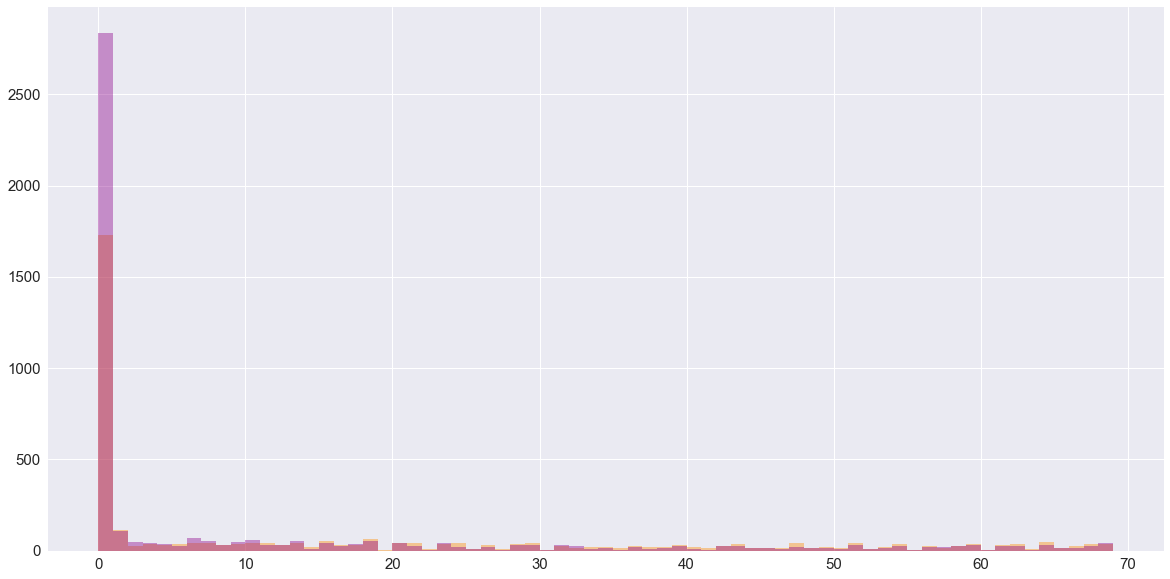

In [29]:
kobe[kobe.shot_made_flag == 0].loc_x.hist(bins = np.arange(0,70,1), color = 'darkorange', alpha = 0.4)
kobe[kobe.shot_made_flag == 1].loc_x.hist(bins = np.arange(0,70,1), color = 'darkmagenta', alpha = 0.4)

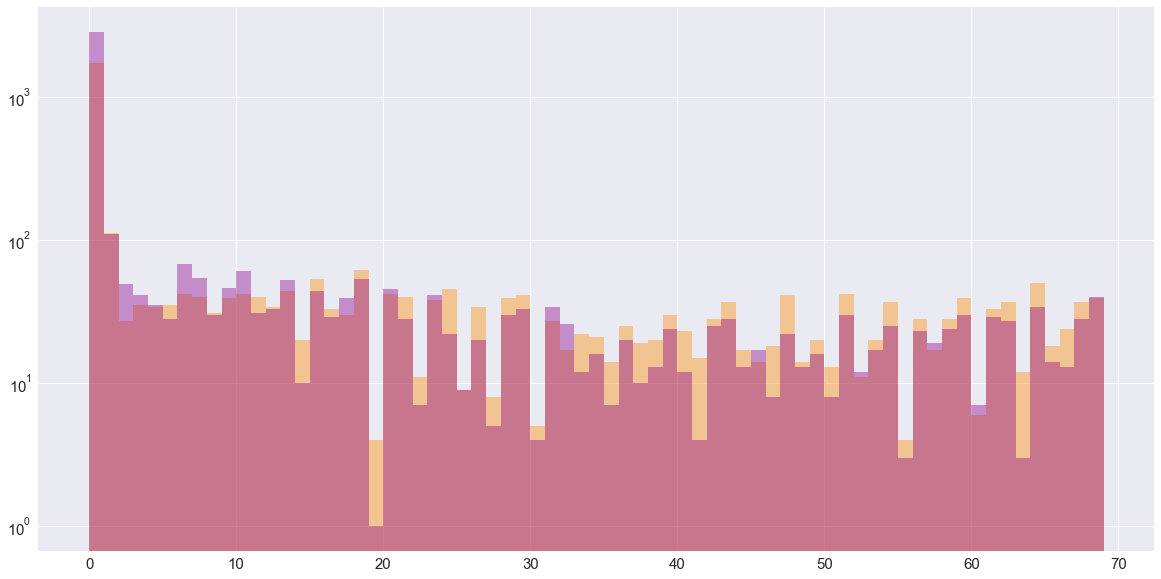

In [30]:
kobe[kobe.shot_made_flag == 0].loc_x.hist(bins = np.arange(0,70,1), 
color = 'darkorange', alpha = 0.4, log = True)

kobe[kobe.shot_made_flag == 1].loc_x.hist(bins = np.arange(0,70,1), 
color = 'darkmagenta', alpha = 0.4, log = True)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [32]:
logreg = LogisticRegression()

In [33]:
loc_x2 = ['loc_x']
    
X1 = kobe[loc_x2]
y = kobe.shot_made_flag

logreg.fit(X1, y)

kobe_pred1 = logreg.predict(X1)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe_pred1.round())

0.5538389695295171

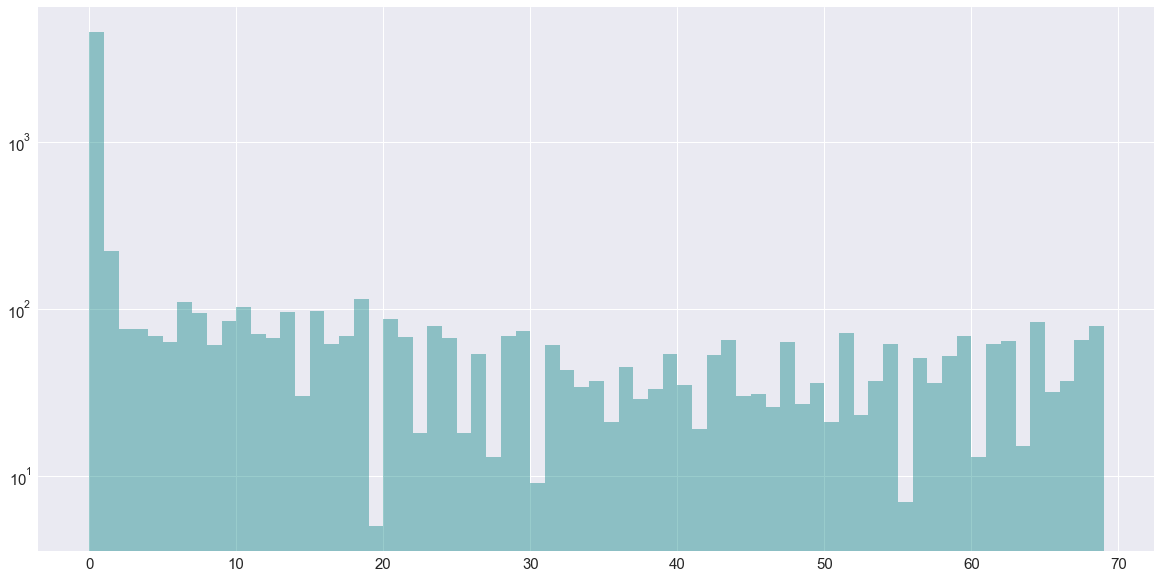

In [35]:
kobe[(kobe_pred1 == 0)].loc_x.hist(bins = np.arange(0,70,1), color = 'teal', alpha = 0.4, log = True)
kobe[(kobe_pred1 == 1)].loc_x.hist(bins = np.arange(0,70,1), color = 'goldenrod', alpha = 0.4, log = True)

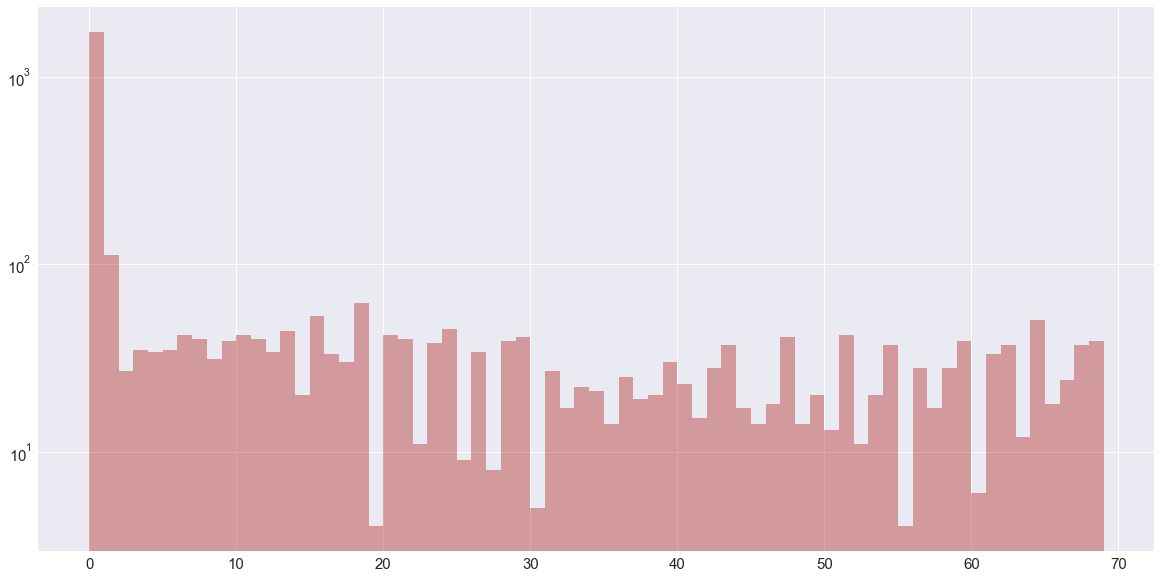

In [36]:
kobe[(kobe_pred1 == 0) & (kobe.shot_made_flag == 0)].loc_x.hist(bins = np.arange(0,70,1), 
color = 'firebrick', alpha = 0.4, log = True)
kobe[(kobe_pred1 == 1) & (kobe.shot_made_flag == 1)].loc_x.hist(bins = np.arange(0,70,1), 
color = 'lime', alpha = 0.4, log = True)

C:\Users\Anchee\Anaconda3\lib\site-packages\matplotlib\ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


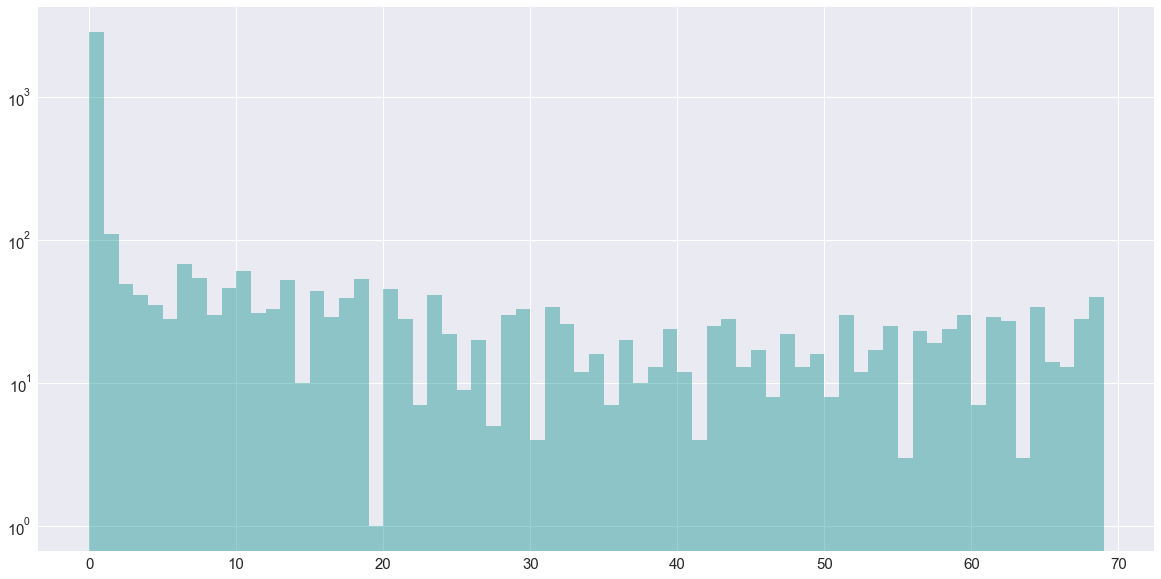

In [37]:
kobe[(kobe_pred1 == 1) & (kobe.shot_made_flag == 0)].loc_x.hist(bins = np.arange(0,70,1), 
color = 'deeppink', alpha = 0.4, log = True)

kobe[(kobe_pred1 == 0) & (kobe.shot_made_flag == 1)].loc_x.hist(bins = np.arange(0,70,1), 
color = 'darkcyan', alpha = 0.4, log = True)

Text(0,0.5,'made')

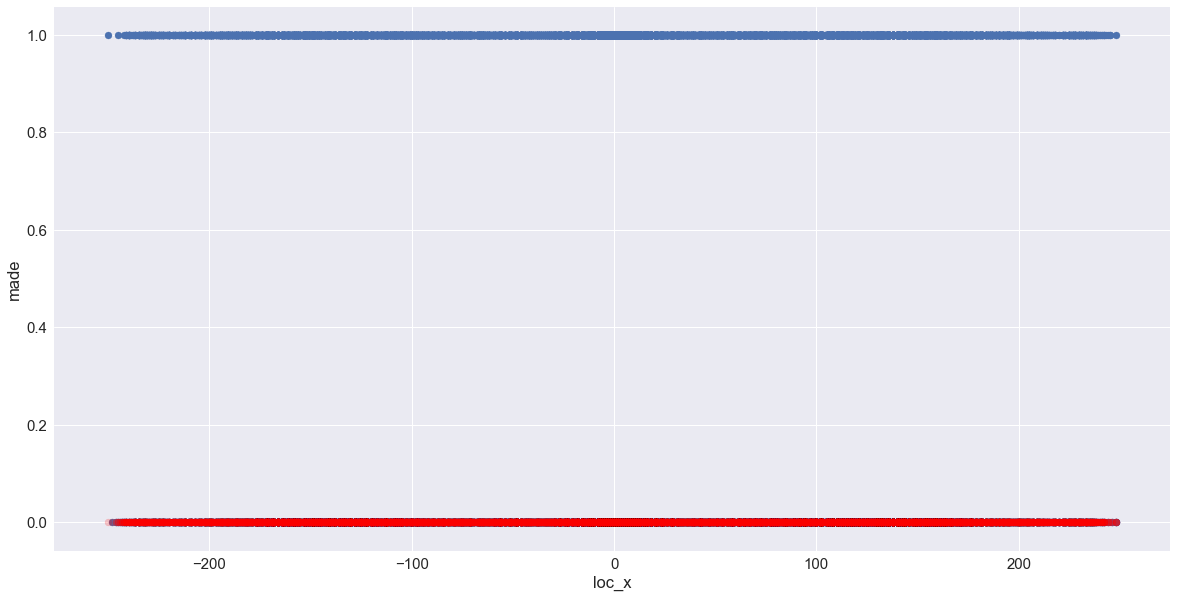

In [38]:
plt.scatter(kobe.loc_x, kobe.shot_made_flag)
plt.scatter(kobe.loc_x, kobe_pred1, color = 'red', alpha = 0.2)
plt.xlabel('loc_x')
plt.ylabel('made')

#### abs_x

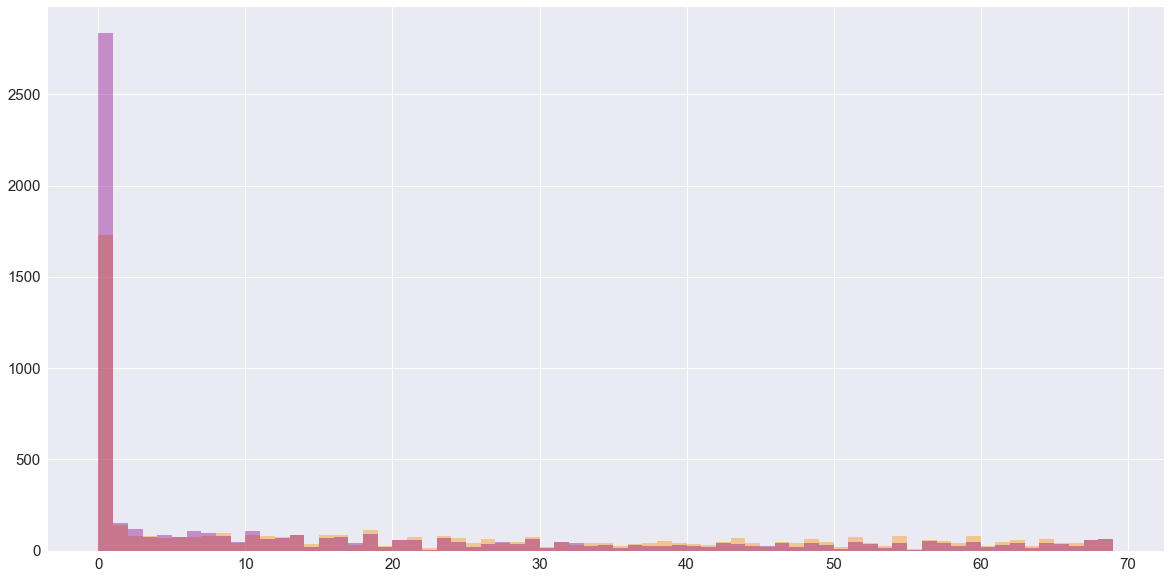

In [39]:
kobe[kobe.shot_made_flag == 0].abs_x.hist(bins = np.arange(0,70,1), color = 'darkorange', alpha = 0.4)
kobe[kobe.shot_made_flag == 1].abs_x.hist(bins = np.arange(0,70,1), color = 'darkmagenta', alpha = 0.4)

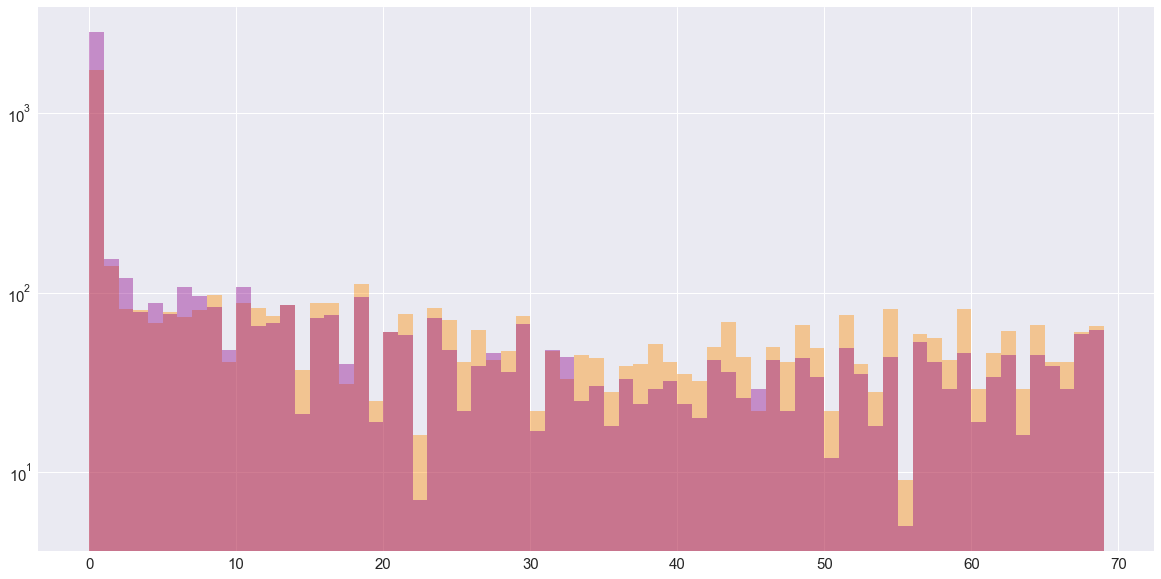

In [40]:
kobe[kobe.shot_made_flag == 0].abs_x.hist(bins = np.arange(0,70,1), 
color = 'darkorange', alpha = 0.4, log = True)

kobe[kobe.shot_made_flag == 1].abs_x.hist(bins = np.arange(0,70,1), 
color = 'darkmagenta', alpha = 0.4, log = True)

In [41]:
abs_x2 = ['abs_x']
    
X2 = kobe[abs_x2]
y = kobe.shot_made_flag

logreg.fit(X2, y)

kobe_pred2 = logreg.predict(X2)

In [42]:
accuracy_score(kobe.shot_made_flag, kobe_pred2.round())

0.5925983577849554

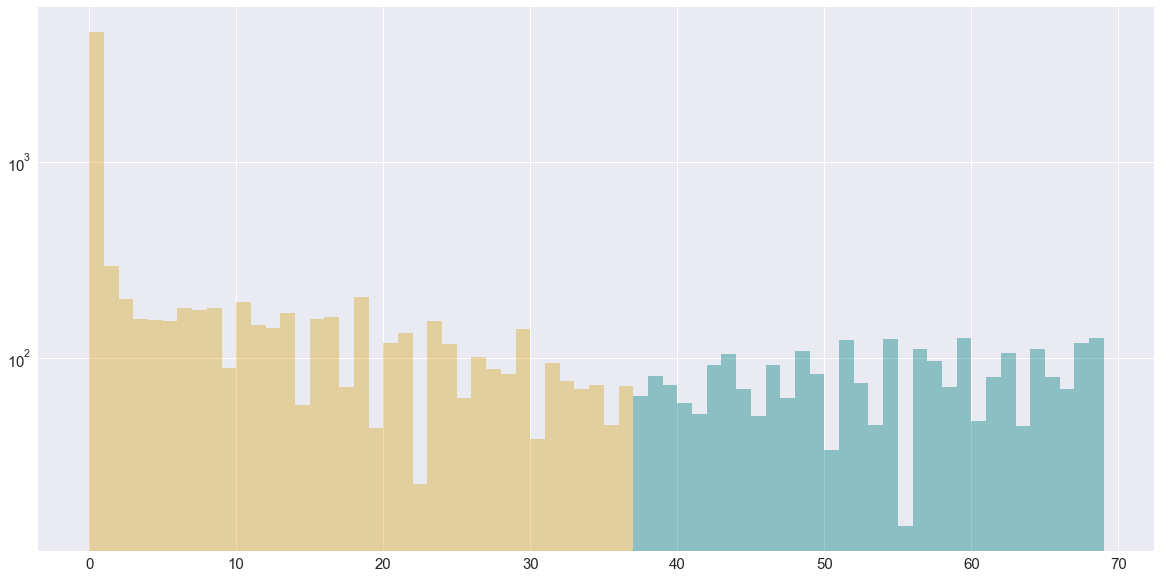

In [43]:
kobe[(kobe_pred2 == 0)].abs_x.hist(bins = np.arange(0,70,1), color = 'teal', alpha = 0.4, log = True)
kobe[(kobe_pred2 == 1)].abs_x.hist(bins = np.arange(0,70,1), color = 'goldenrod', alpha = 0.4, log = True)

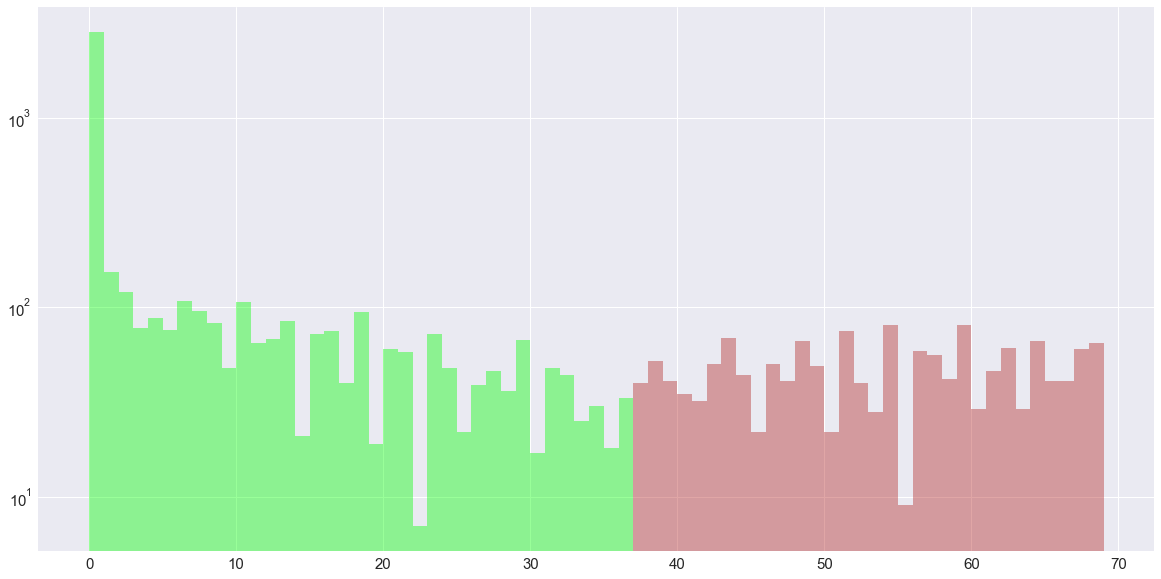

In [44]:
kobe[(kobe_pred2 == 0) & (kobe.shot_made_flag == 0)].abs_x.hist(bins = np.arange(0,70,1), color = 'firebrick', 
alpha = 0.4, log = True)

kobe[(kobe_pred2 == 1) & (kobe.shot_made_flag == 1)].abs_x.hist(bins = np.arange(0,70,1), color = 'lime', 
alpha = 0.4, log = True)

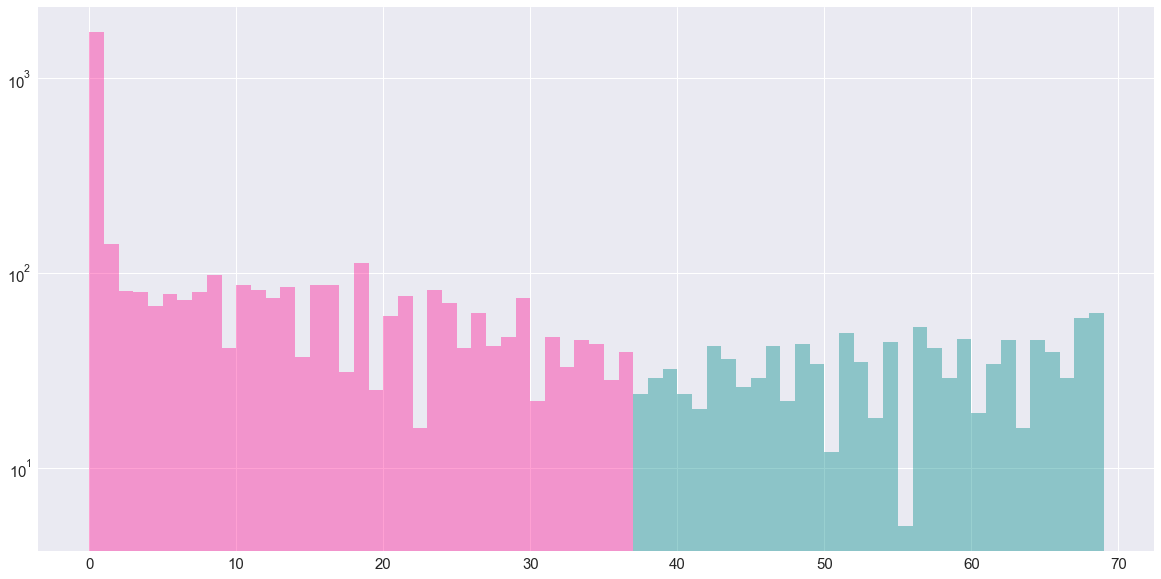

In [45]:
kobe[(kobe_pred2 == 1) & (kobe.shot_made_flag == 0)].abs_x.hist(bins = np.arange(0,70,1), color = 'deeppink', 
alpha = 0.4, log = True)

kobe[(kobe_pred2 == 0) & (kobe.shot_made_flag == 1)].abs_x.hist(bins = np.arange(0,70,1), color = 'darkcyan', 
alpha = 0.4, log = True)

Text(0,0.5,'made')

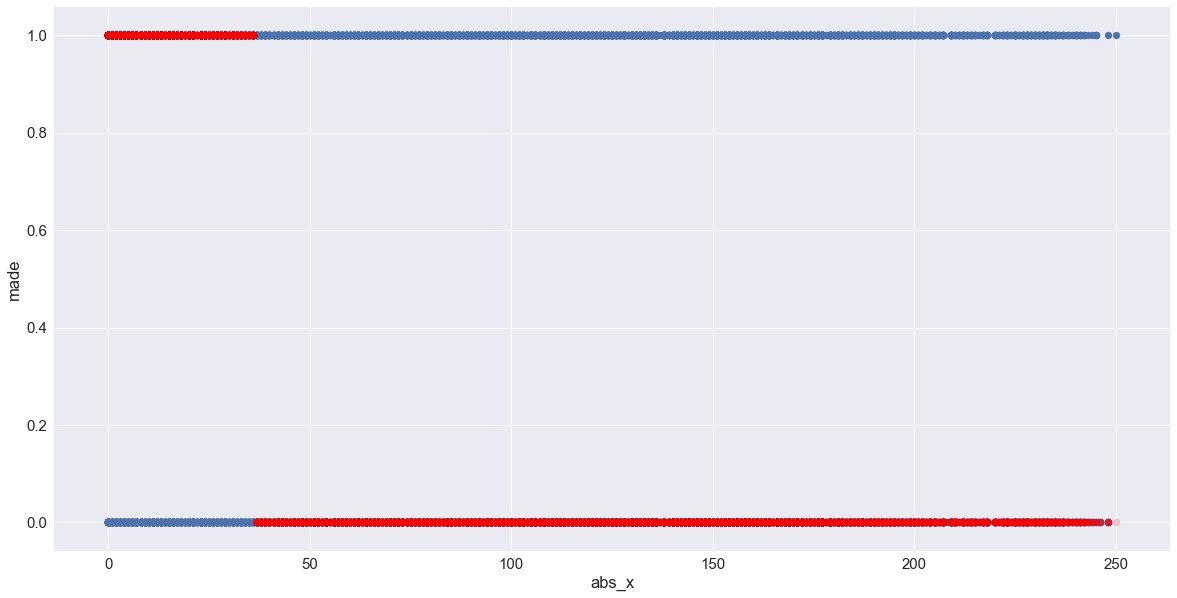

In [46]:
plt.scatter(kobe.abs_x, kobe.shot_made_flag)
plt.scatter(kobe.abs_x, kobe_pred2, color = 'red', alpha = 0.2)
plt.xlabel('abs_x')
plt.ylabel('made')

We can see that `abs_x` is a better feature/column to use in a Logsitic Regression model instead of `loc_x`, because `abs_x` has a better prediction than `loc_x`.

### 2.  Convert several (including ` ` ) string columns/features into numerical and attempt to use them in fitting a Logistic Regression model. Show histograms (similar to ones above) of made/missed of these new numerical features. Use these histograms to explain and justify why these features could improve the model

I used `combined_shot_type`, `shot_type`, `shot_zone_area`, `shot_zone_basic`, `shot_zone_range`, and `action_type` in the following logistic regression models.

In [47]:
kobe.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
pred                  float64
abs_x                   int64
dtype: object

#### `combine_shot_type`

In [48]:
kobe.combined_shot_type.value_counts()

Jump Shot    19710
Layup         4532
Dunk          1056
Tip Shot       152
Hook Shot      127
Bank Shot      120
Name: combined_shot_type, dtype: int64

In [49]:
kobe['combined_shot_type'] = pd.Categorical(kobe.combined_shot_type)

In [50]:
kobe['combined_shot_type'] = kobe['combined_shot_type'].cat.codes

In [51]:
kobe.combined_shot_type.value_counts()

3    19710
4     4532
1     1056
5      152
2      127
0      120
Name: combined_shot_type, dtype: int64

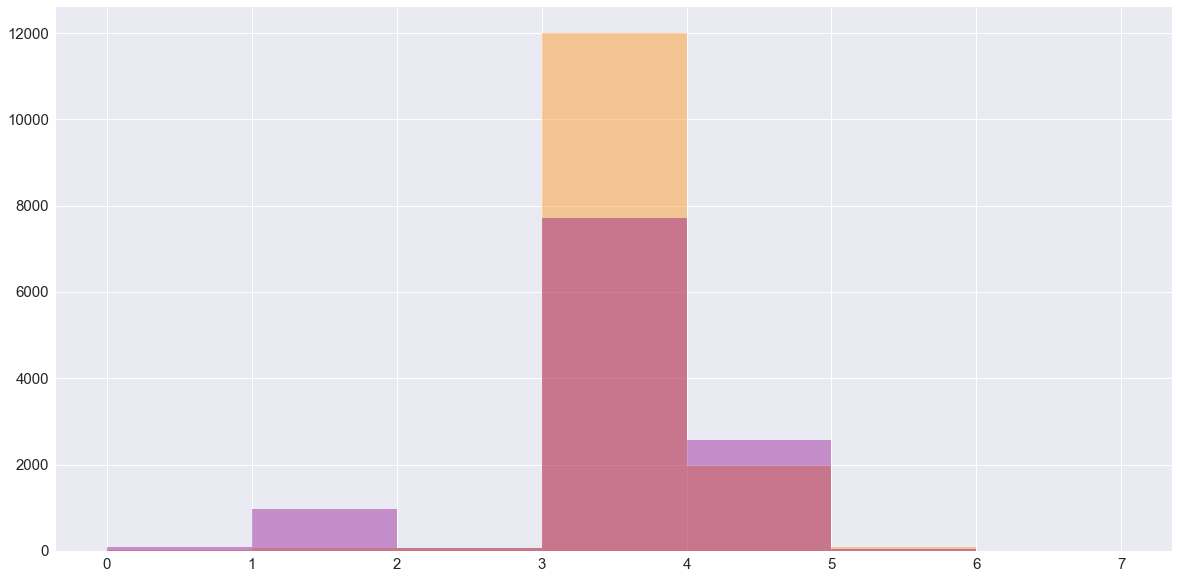

In [52]:
kobe[kobe.shot_made_flag == 0].combined_shot_type.hist(bins = np.arange(0,8,1), 
color = 'darkorange', alpha = 0.4)

kobe[kobe.shot_made_flag == 1].combined_shot_type.hist(bins = np.arange(0,8,1), 
color = 'darkmagenta', alpha = 0.4)

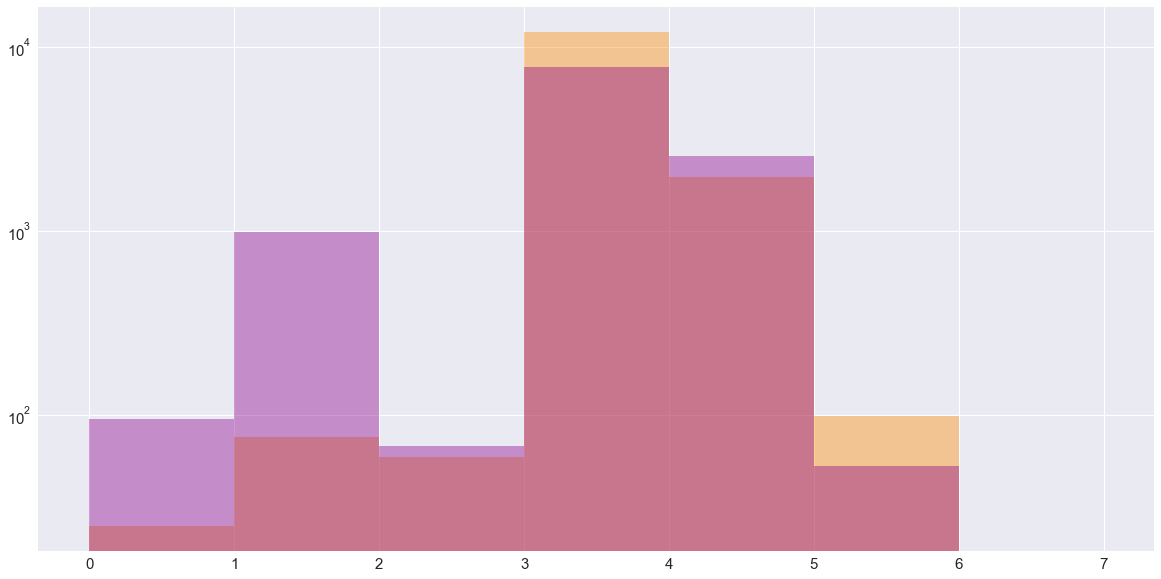

In [53]:
kobe[kobe.shot_made_flag == 0].combined_shot_type.hist(bins = np.arange(0,8,1), 
color = 'darkorange', alpha = 0.4, log = True)

kobe[kobe.shot_made_flag == 1].combined_shot_type.hist(bins = np.arange(0,8,1), 
color = 'darkmagenta', alpha = 0.4, log = True)

In [54]:
combine = ['combined_shot_type']
    
X3 = kobe[combine]
y = kobe.shot_made_flag

logreg.fit(X3, y)

kobe_pred3 = logreg.predict(X3)

In [55]:
accuracy_score(kobe.shot_made_flag, kobe_pred3.round())

0.5920924621551154

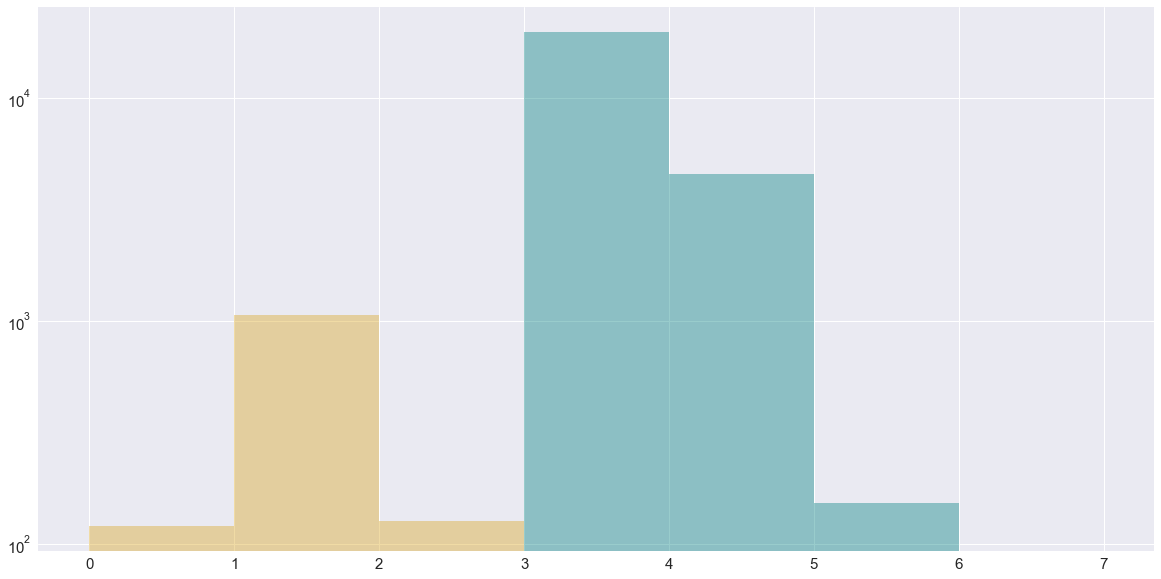

In [56]:
kobe[(kobe_pred3 == 0)].combined_shot_type.hist(bins = np.arange(0,8,1), 
color = 'teal', alpha = 0.4, log = True)

kobe[(kobe_pred3 == 1)].combined_shot_type.hist(bins = np.arange(0,8,1), 
color = 'goldenrod', alpha = 0.4, log = True)

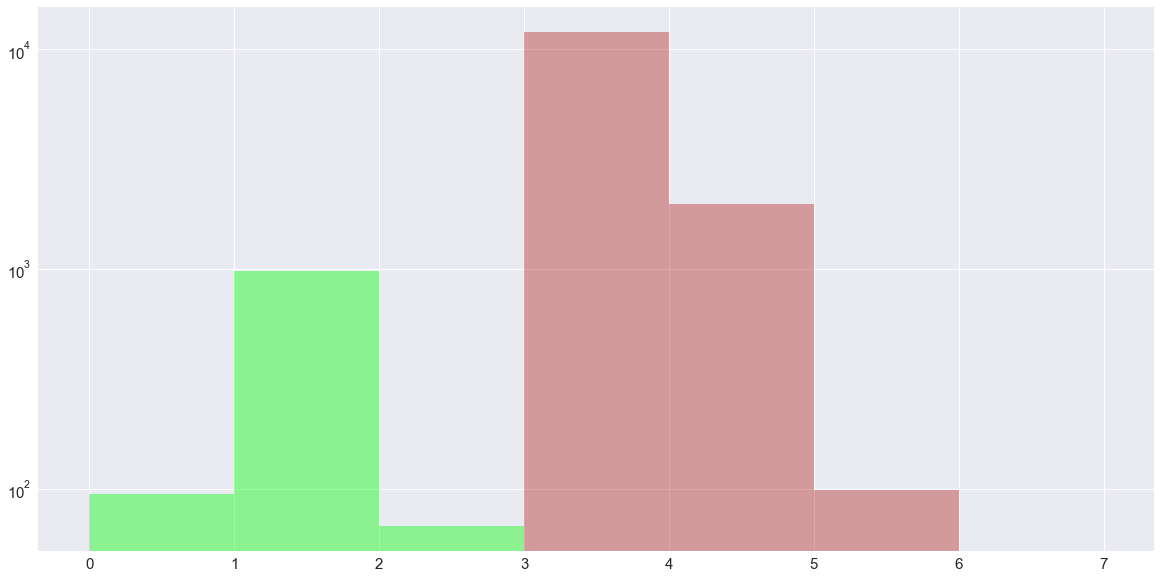

In [57]:
kobe[(kobe_pred3 == 0) & (kobe.shot_made_flag == 0)].combined_shot_type.hist(bins = np.arange(0,8,1), 
color = 'firebrick', alpha = 0.4, log = True)

kobe[(kobe_pred3 == 1) & (kobe.shot_made_flag == 1)].combined_shot_type.hist(bins = np.arange(0,8,1), 
color = 'lime', alpha = 0.4, log = True)

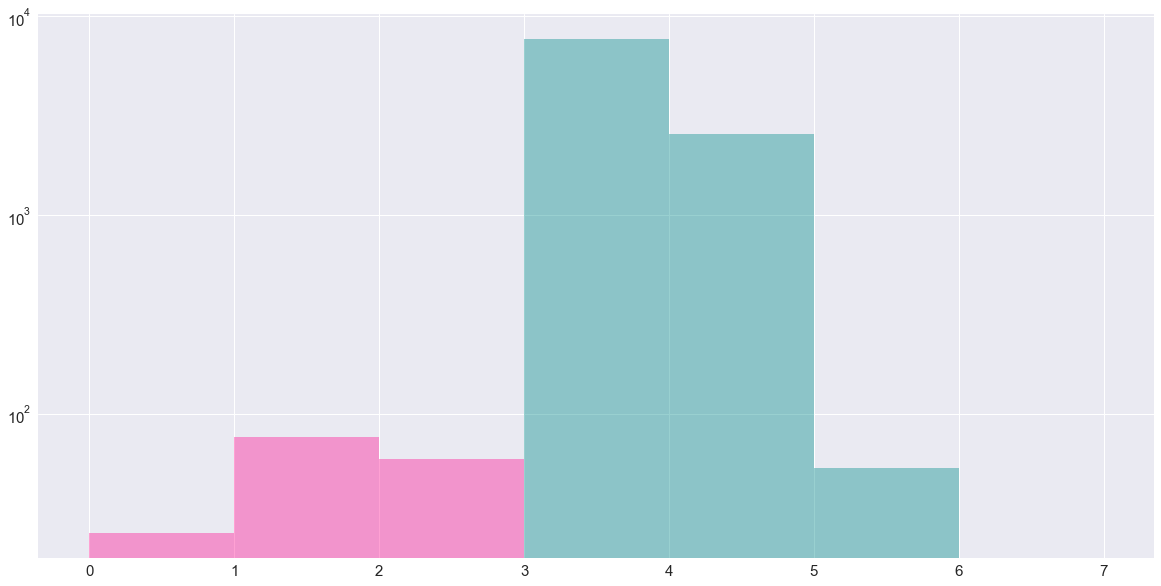

In [58]:
kobe[(kobe_pred3 == 1) & (kobe.shot_made_flag == 0)].combined_shot_type.hist(bins = np.arange(0,8,1), 
color = 'deeppink', alpha = 0.4, log = True)

kobe[(kobe_pred3 == 0) & (kobe.shot_made_flag == 1)].combined_shot_type.hist(bins = np.arange(0,8,1), 
color = 'darkcyan', alpha = 0.4, log = True)

#### `shot_type`

In [59]:
kobe.shot_type.value_counts()

2PT Field Goal    20285
3PT Field Goal     5412
Name: shot_type, dtype: int64

In [60]:
kobe['shot_type'] = pd.Categorical(kobe.shot_type)

In [61]:
kobe['shot_type'] = kobe['shot_type'].cat.codes

In [62]:
kobe.shot_type.value_counts()

0    20285
1     5412
Name: shot_type, dtype: int64

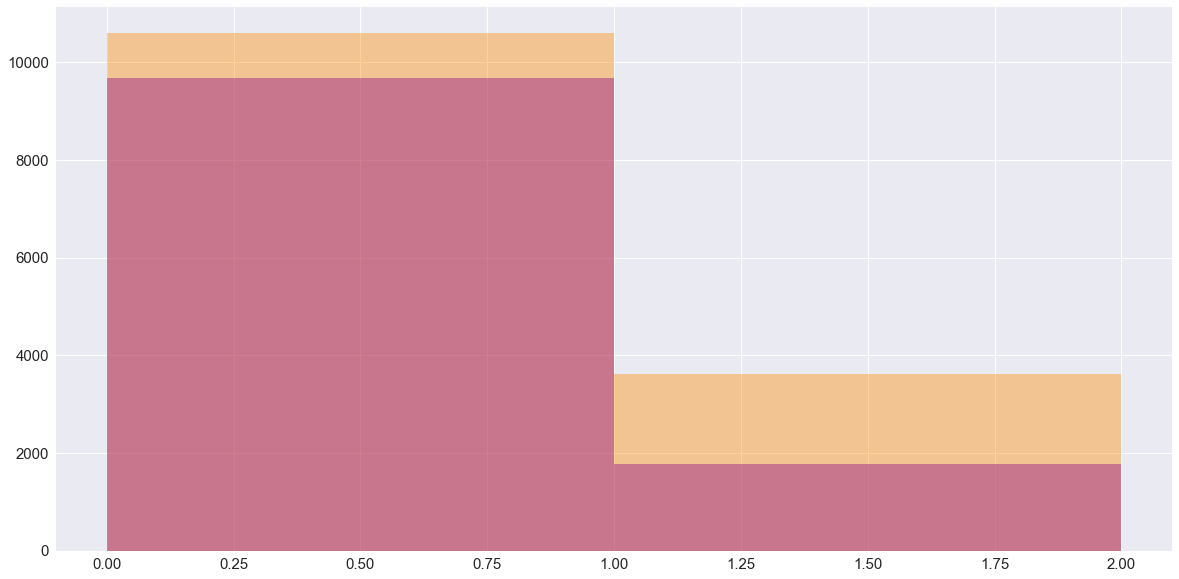

In [63]:
kobe[kobe.shot_made_flag == 0].shot_type.hist(bins = np.arange(0,3,1), color = 'darkorange', alpha = 0.4)
kobe[kobe.shot_made_flag == 1].shot_type.hist(bins = np.arange(0,3,1), color = 'darkmagenta', alpha = 0.4)

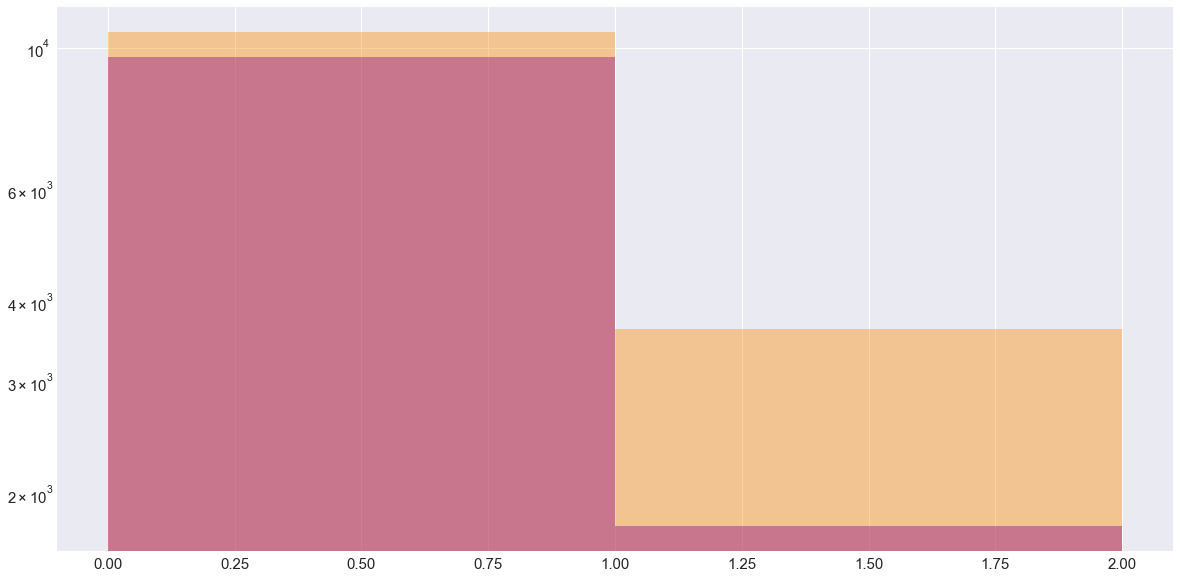

In [64]:
kobe[kobe.shot_made_flag == 0].shot_type.hist(bins = np.arange(0,3,1), 
color = 'darkorange', alpha = 0.4, log = True)

kobe[kobe.shot_made_flag == 1].shot_type.hist(bins = np.arange(0,3,1), 
color = 'darkmagenta', alpha = 0.4, log = True)

In [65]:
shot_type2 = ['shot_type']
    
X4 = kobe[shot_type2]
y = kobe.shot_made_flag

logreg.fit(X4, y)

kobe_pred4 = logreg.predict(X4)

In [66]:
accuracy_score(kobe.shot_made_flag, kobe_pred4.round())

0.5538389695295171

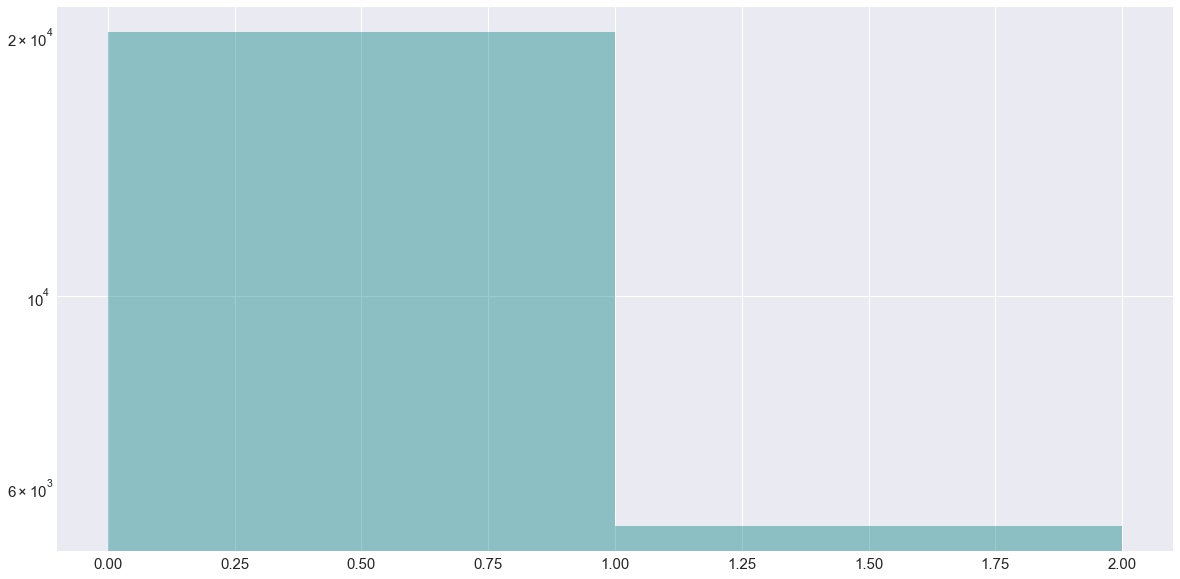

In [67]:
kobe[(kobe_pred4 == 0)].shot_type.hist(bins = np.arange(0,3,1), color = 'teal', alpha = 0.4, log = True)

kobe[(kobe_pred4 == 1)].shot_type.hist(bins = np.arange(0,3,1), color = 'goldenrod', alpha = 0.4, log = True)

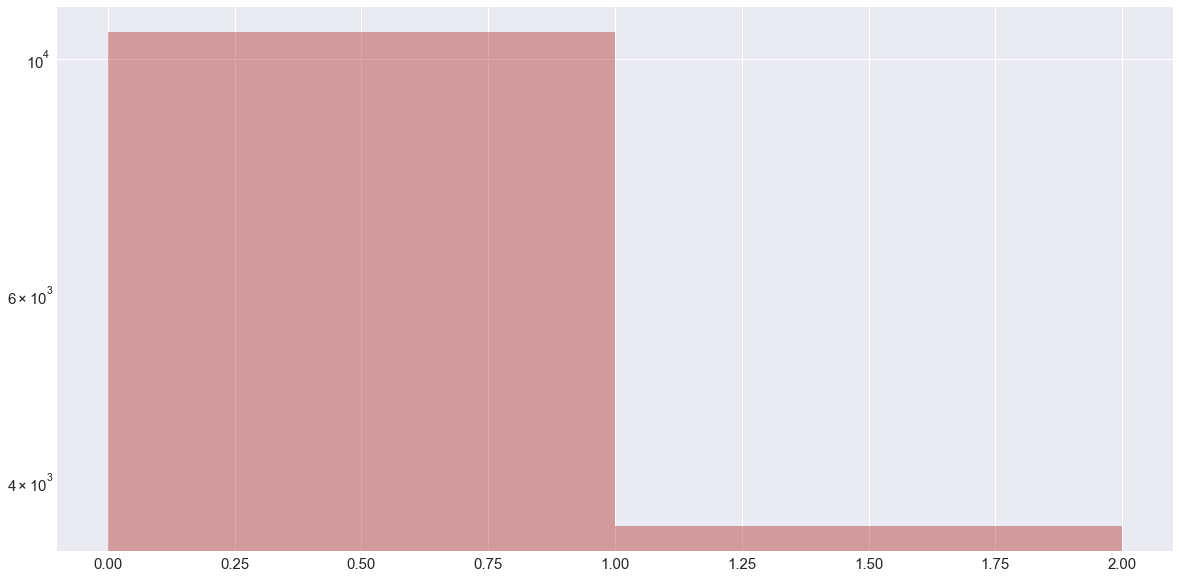

In [68]:
kobe[(kobe_pred4 == 0) & (kobe.shot_made_flag == 0)].shot_type.hist(bins = np.arange(0,3,1), 
color = 'firebrick', alpha = 0.4, log = True)

kobe[(kobe_pred4 == 1) & (kobe.shot_made_flag == 1)].shot_type.hist(bins = np.arange(0,3,1), 
color = 'lime', alpha = 0.4, log = True)

C:\Users\Anchee\Anaconda3\lib\site-packages\matplotlib\ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


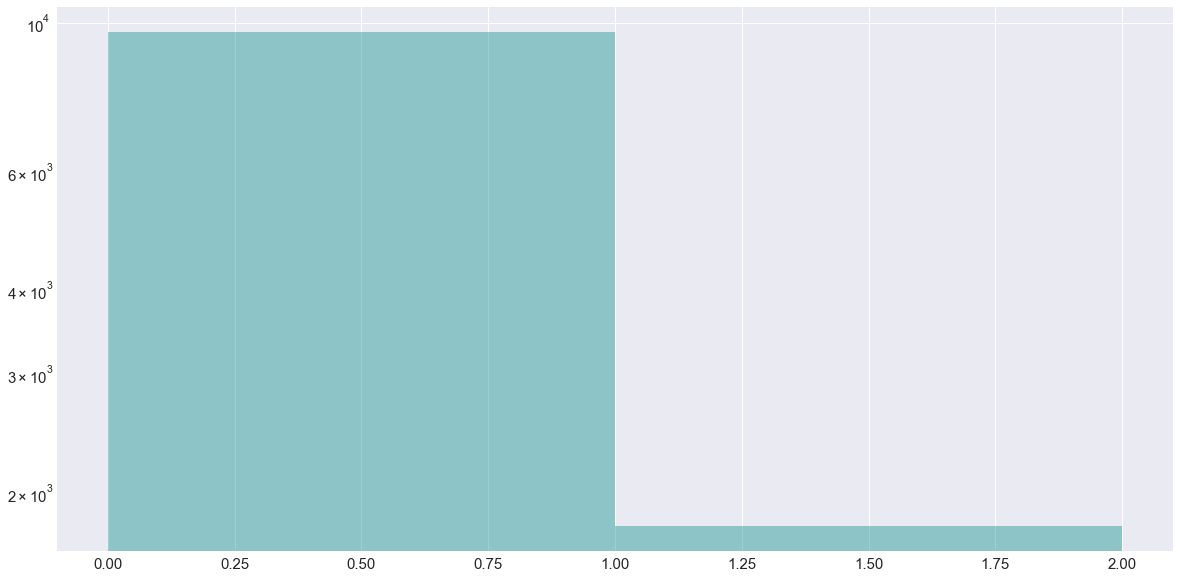

In [69]:
kobe[(kobe_pred4 == 1) & (kobe.shot_made_flag == 0)].shot_type.hist(bins = np.arange(0,3,1), 
color = 'deeppink', alpha = 0.4, log = True)

kobe[(kobe_pred4 == 0) & (kobe.shot_made_flag == 1)].shot_type.hist(bins = np.arange(0,3,1), 
color = 'darkcyan', alpha = 0.4, log = True)

#### `shot_zone_area`

In [70]:
kobe.shot_zone_area.value_counts()

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64

In [71]:
kobe['shot_zone_area'] = pd.Categorical(kobe.shot_zone_area)

In [72]:
kobe['shot_zone_area'] = kobe['shot_zone_area'].cat.codes

In [73]:
kobe.shot_zone_area.value_counts()

1    11289
4     3981
5     3859
2     3364
3     3132
0       72
Name: shot_zone_area, dtype: int64

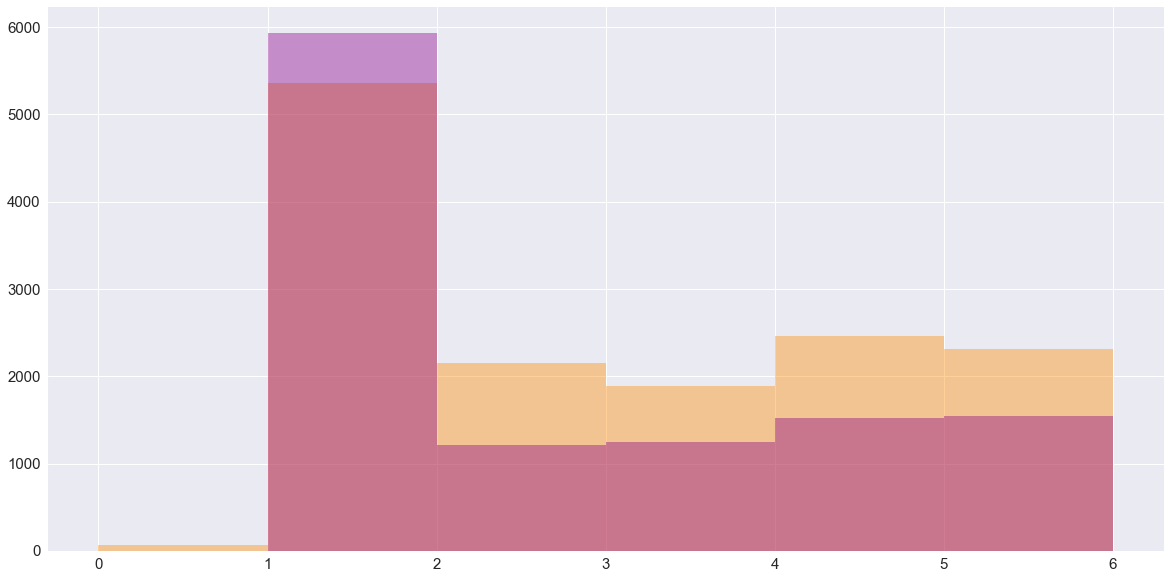

In [74]:
kobe[kobe.shot_made_flag == 0].shot_zone_area.hist(bins = np.arange(0,7,1), color = 'darkorange', alpha = 0.4)
kobe[kobe.shot_made_flag == 1].shot_zone_area.hist(bins = np.arange(0,7,1), color = 'darkmagenta',alpha = 0.4)

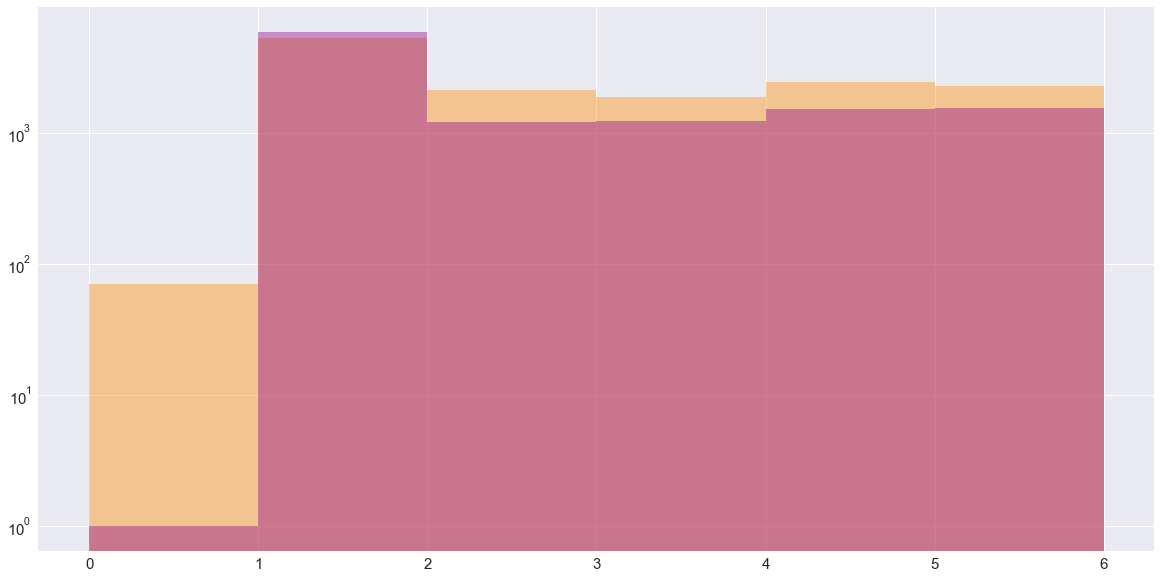

In [75]:
kobe[kobe.shot_made_flag == 0].shot_zone_area.hist(bins = np.arange(0,7,1), 
color = 'darkorange', alpha = 0.4, log = True)

kobe[kobe.shot_made_flag == 1].shot_zone_area.hist(bins = np.arange(0,7,1), 
color = 'darkmagenta',alpha = 0.4, log = True)

In [76]:
zonearea = ['shot_zone_area']
    
X5 = kobe[zonearea]
y = kobe.shot_made_flag

logreg.fit(X5, y)

kobe_pred5 = logreg.predict(X5)

In [77]:
accuracy_score(kobe.shot_made_flag, kobe_pred5.round())

0.5511149161380706

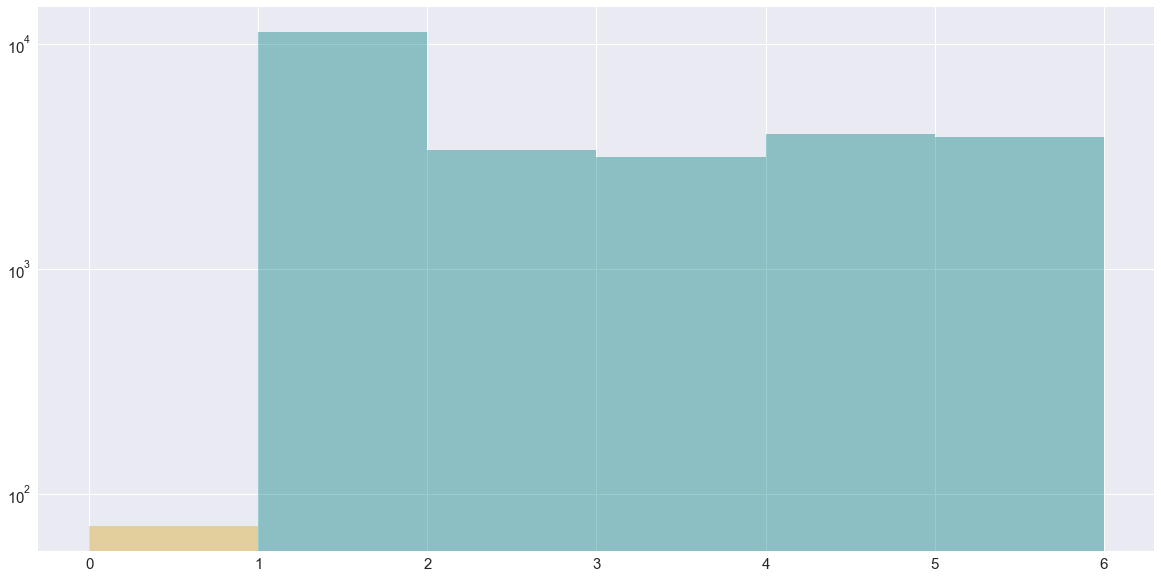

In [78]:
kobe[(kobe_pred5 == 0)].shot_zone_area.hist(bins = np.arange(0,7,1), color = 'teal', alpha = 0.4, log = True)

kobe[(kobe_pred5 == 1)].shot_zone_area.hist(bins = np.arange(0,7,1), 
color = 'goldenrod', alpha = 0.4, log = True)

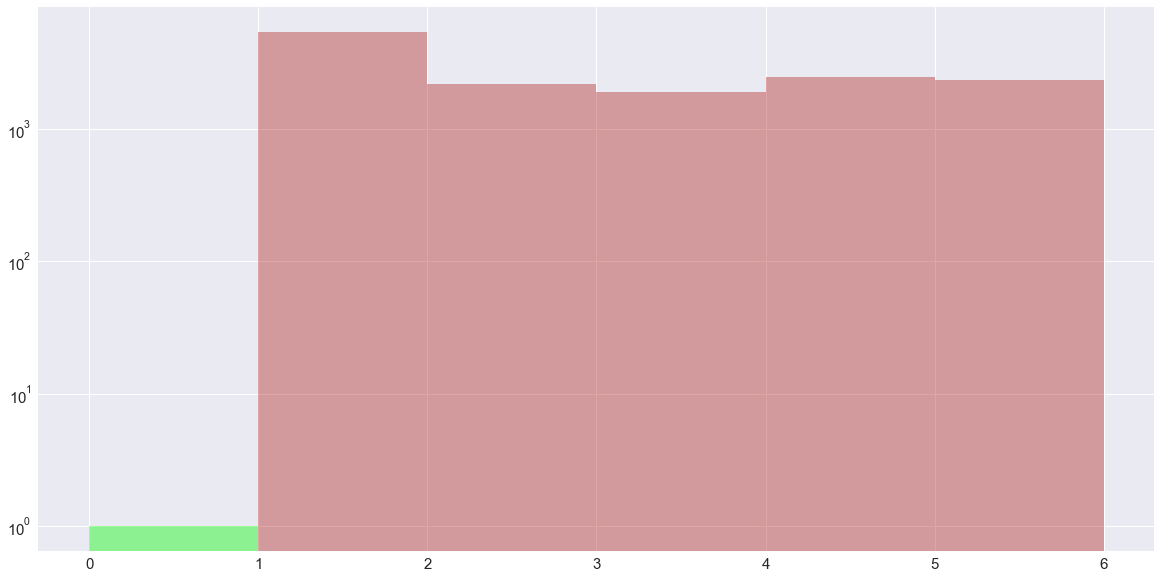

In [79]:
kobe[(kobe_pred5 == 0) & (kobe.shot_made_flag == 0)].shot_zone_area.hist(bins = np.arange(0,7,1), 
color = 'firebrick', alpha = 0.4, log = True)

kobe[(kobe_pred5 == 1) & (kobe.shot_made_flag == 1)].shot_zone_area.hist(bins = np.arange(0,7,1), 
color = 'lime', alpha = 0.4, log = True)

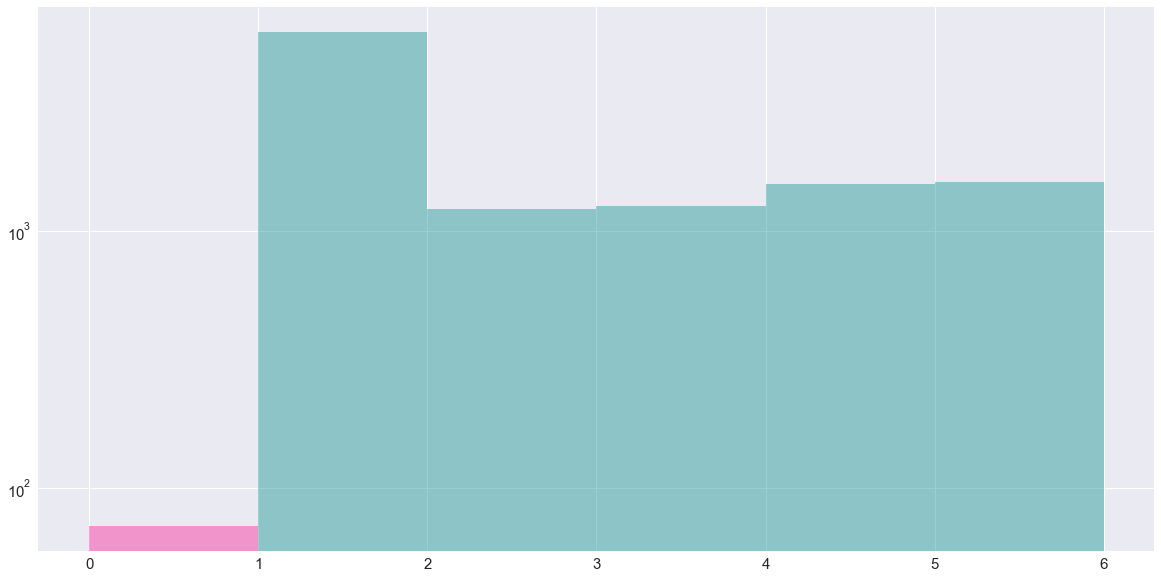

In [80]:
kobe[(kobe_pred5 == 1) & (kobe.shot_made_flag == 0)].shot_zone_area.hist(bins = np.arange(0,7,1), 
color = 'deeppink', alpha = 0.4, log = True)

kobe[(kobe_pred5 == 0) & (kobe.shot_made_flag == 1)].shot_zone_area.hist(bins = np.arange(0,7,1), 
color = 'darkcyan', alpha = 0.4, log = True)

#### `shot_zone_basic`

In [81]:
kobe.shot_zone_basic.value_counts()

Mid-Range                10532
Restricted Area           5932
Above the Break 3         4720
In The Paint (Non-RA)     3880
Right Corner 3             333
Left Corner 3              240
Backcourt                   60
Name: shot_zone_basic, dtype: int64

In [82]:
kobe['shot_zone_basic'] = pd.Categorical(kobe.shot_zone_basic)

In [83]:
kobe['shot_zone_basic'] = kobe['shot_zone_basic'].cat.codes

In [84]:
kobe.shot_zone_basic.value_counts()

4    10532
5     5932
0     4720
2     3880
6      333
3      240
1       60
Name: shot_zone_basic, dtype: int64

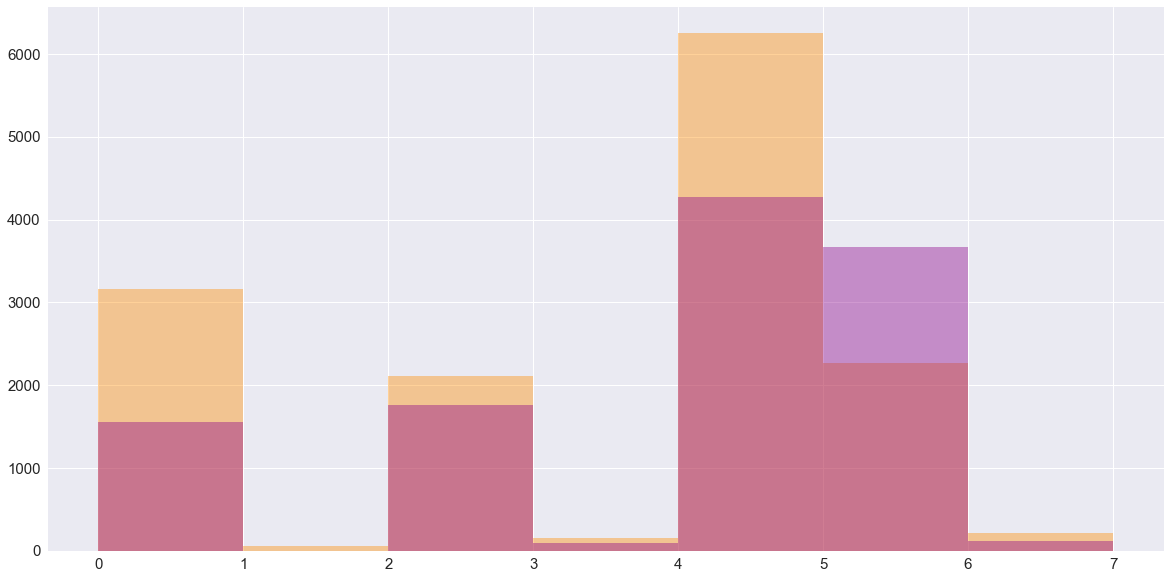

In [85]:
kobe[kobe.shot_made_flag == 0].shot_zone_basic.hist(bins = np.arange(0,8,1), color = 'darkorange', alpha = 0.4)
kobe[kobe.shot_made_flag == 1].shot_zone_basic.hist(bins = np.arange(0,8,1), color = 'darkmagenta',alpha = 0.4)

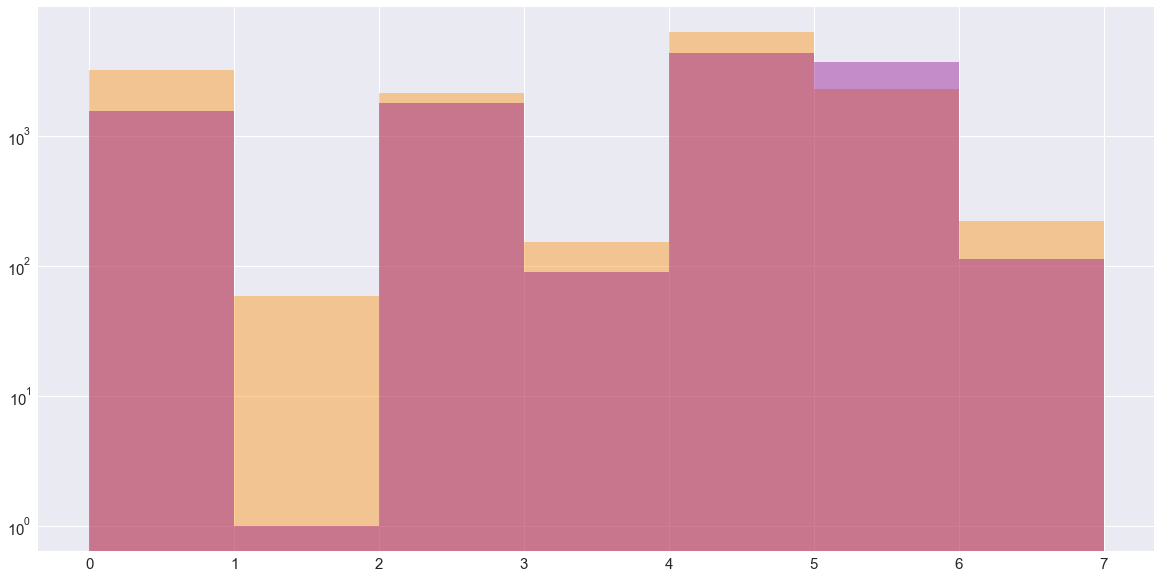

In [86]:
kobe[kobe.shot_made_flag == 0].shot_zone_basic.hist(bins = np.arange(0,8,1), 
color = 'darkorange', alpha = 0.4, log = True)

kobe[kobe.shot_made_flag == 1].shot_zone_basic.hist(bins = np.arange(0,8,1), 
color = 'darkmagenta',alpha = 0.4, log = True)

In [87]:
basic = ['shot_zone_basic']
    
X6 = kobe[basic]
y = kobe.shot_made_flag

logreg.fit(X6, y)

kobe_pred6 = logreg.predict(X6)

In [88]:
accuracy_score(kobe.shot_made_flag, kobe_pred6.round())

0.6041561271743783

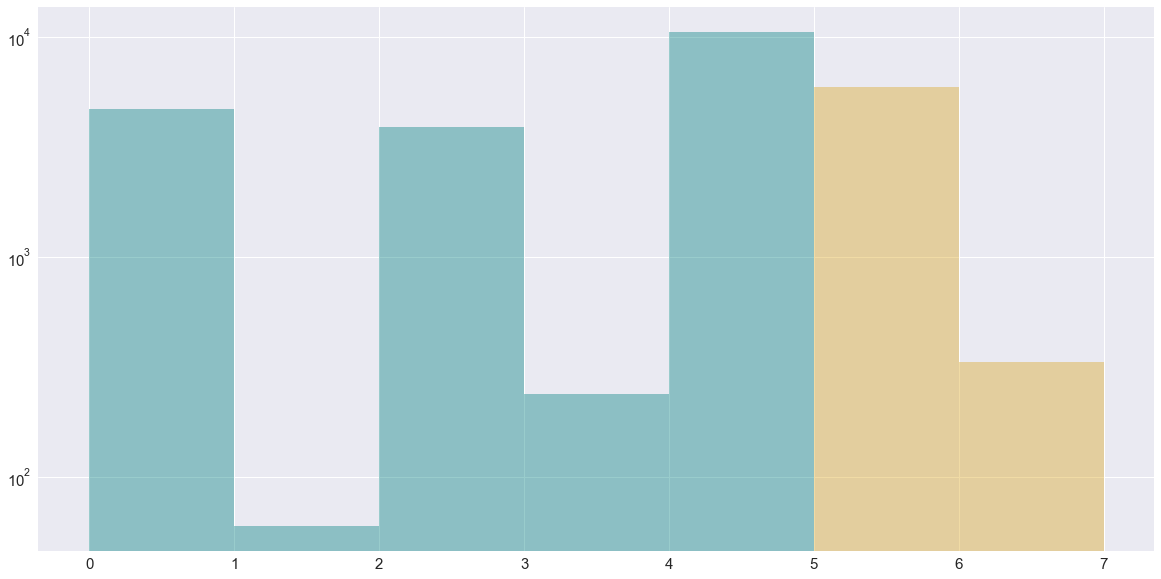

In [89]:
kobe[(kobe_pred6 == 0)].shot_zone_basic.hist(bins = np.arange(0,8,1), color = 'teal', alpha = 0.4, log = True)

kobe[(kobe_pred6 == 1)].shot_zone_basic.hist(bins = np.arange(0,8,1), 
color = 'goldenrod', alpha = 0.4, log = True)

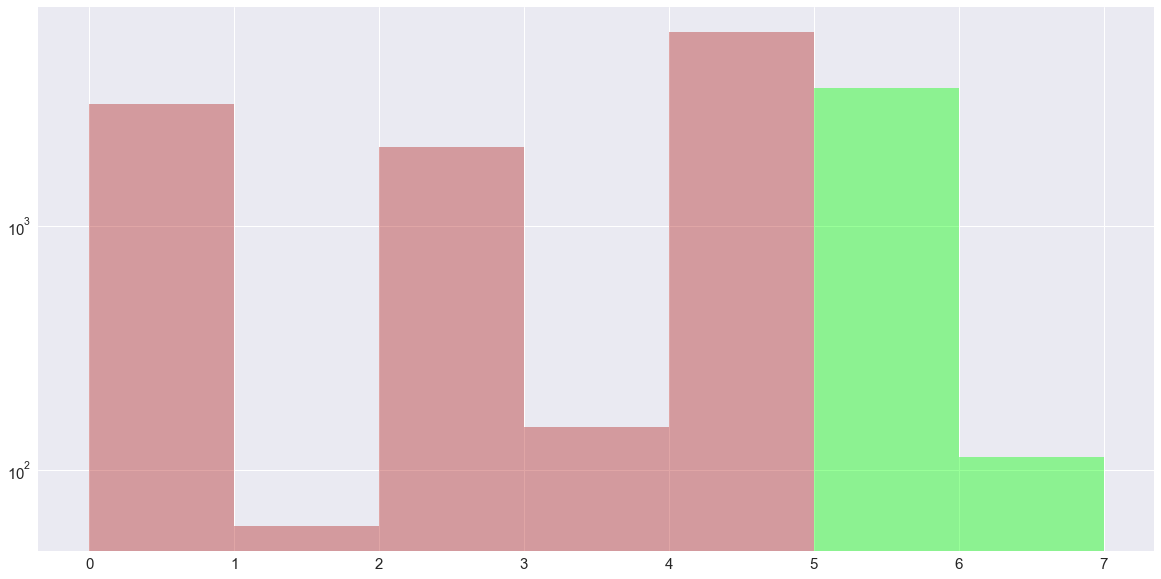

In [90]:
kobe[(kobe_pred6 == 0) & (kobe.shot_made_flag == 0)].shot_zone_basic.hist(bins = np.arange(0,8,1), 
color = 'firebrick', alpha = 0.4, log = True)

kobe[(kobe_pred6 == 1) & (kobe.shot_made_flag == 1)].shot_zone_basic.hist(bins = np.arange(0,8,1), 
color = 'lime', alpha = 0.4, log = True)

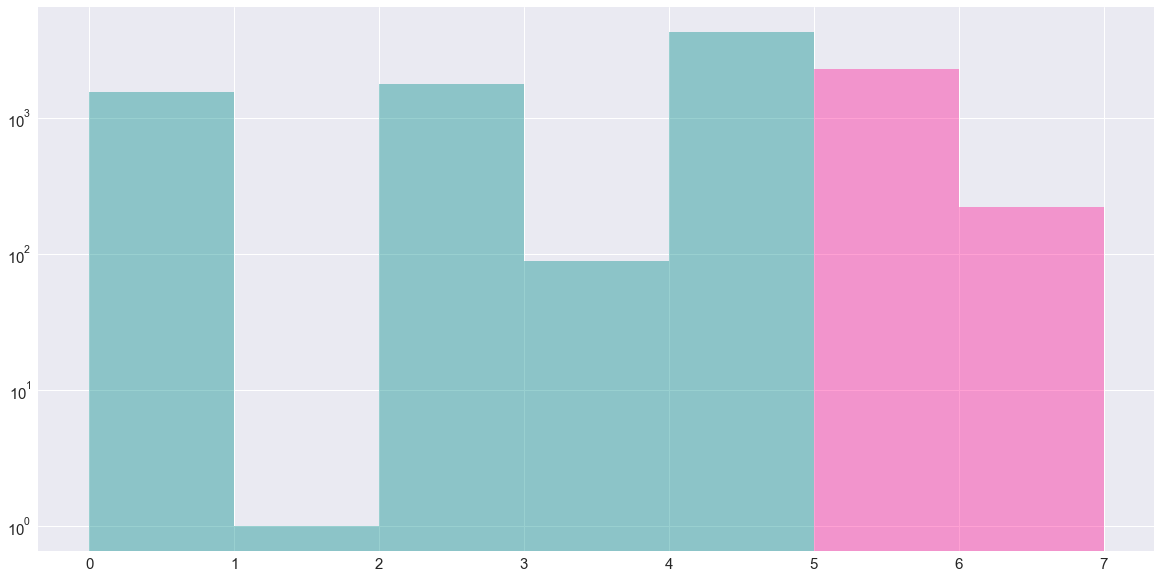

In [91]:
kobe[(kobe_pred6 == 1) & (kobe.shot_made_flag == 0)].shot_zone_basic.hist(bins = np.arange(0,8,1), 
color = 'deeppink', alpha = 0.4, log = True)

kobe[(kobe_pred6 == 0) & (kobe.shot_made_flag == 1)].shot_zone_basic.hist(bins = np.arange(0,8,1), 
color = 'darkcyan', alpha = 0.4, log = True)

#### `shot_zone_range`

In [92]:
kobe.shot_zone_range.value_counts()

Less Than 8 ft.    7857
16-24 ft.          6907
8-16 ft.           5580
24+ ft.            5281
Back Court Shot      72
Name: shot_zone_range, dtype: int64

In [93]:
kobe['shot_zone_range'] = pd.Categorical(kobe.shot_zone_range)

In [94]:
kobe['shot_zone_range'] = kobe['shot_zone_range'].cat.codes

In [95]:
kobe.shot_zone_range.value_counts()

4    7857
0    6907
2    5580
1    5281
3      72
Name: shot_zone_range, dtype: int64

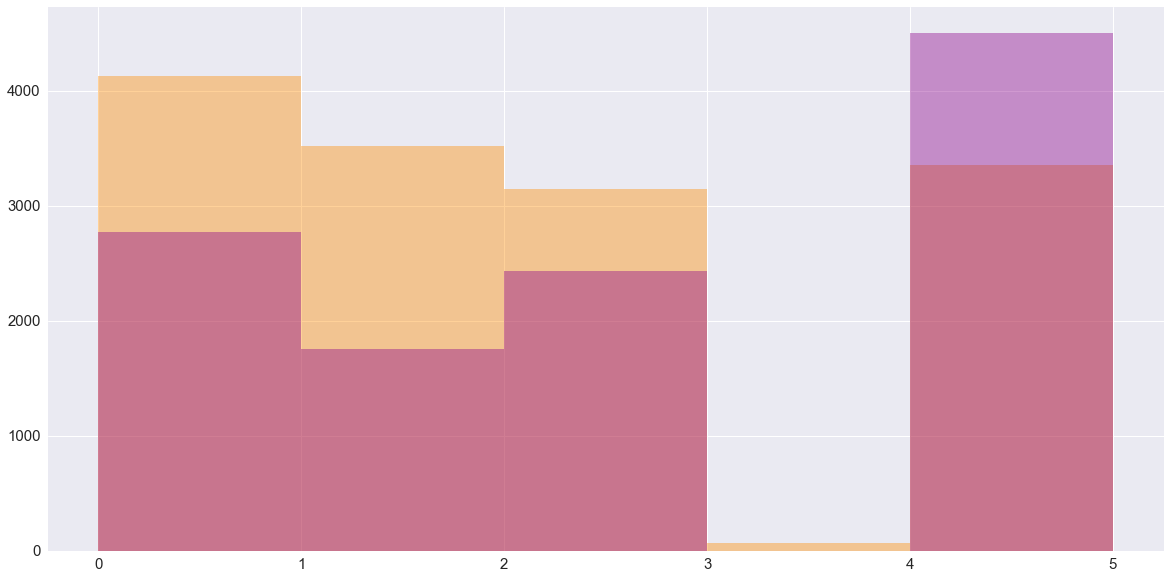

In [96]:
kobe[kobe.shot_made_flag == 0].shot_zone_range.hist(bins = np.arange(0,6,1), 
color = 'darkorange', alpha = 0.4)

kobe[kobe.shot_made_flag == 1].shot_zone_range.hist(bins = np.arange(0,6,1), 
color = 'darkmagenta',alpha = 0.4)

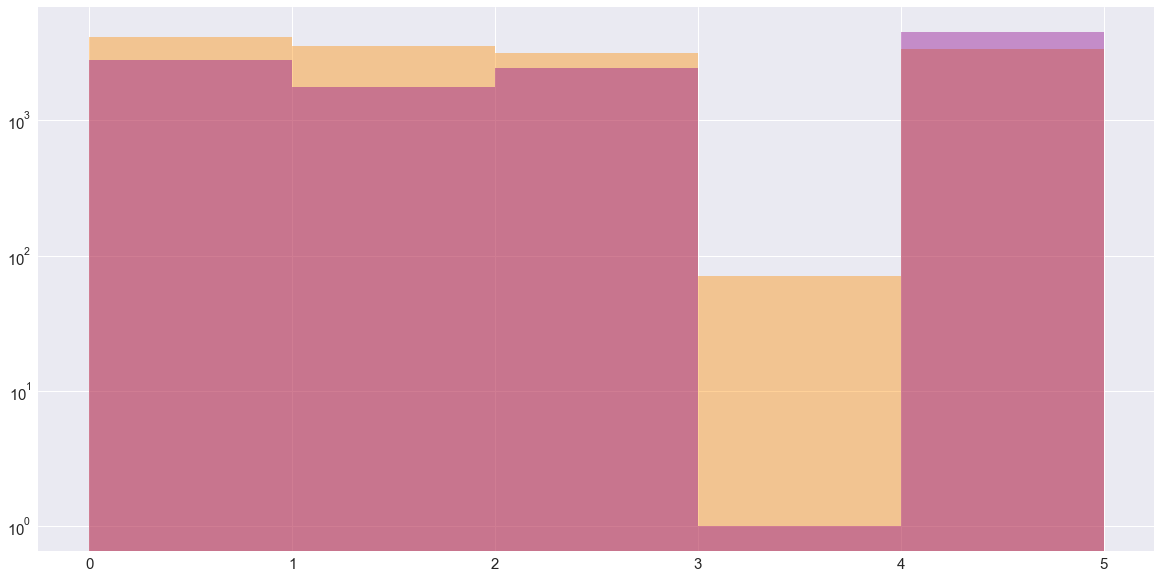

In [97]:
kobe[kobe.shot_made_flag == 0].shot_zone_range.hist(bins = np.arange(0,6,1), 
color = 'darkorange', alpha = 0.4, log = True)
kobe[kobe.shot_made_flag == 1].shot_zone_range.hist(bins = np.arange(0,6,1), 
color = 'darkmagenta',alpha = 0.4, log = True)

In [98]:
shotrange = ['shot_zone_range']
    
X7 = kobe[shotrange]
y = kobe.shot_made_flag

logreg.fit(X7, y)

kobe_pred7 = logreg.predict(X7)

In [99]:
accuracy_score(kobe.shot_made_flag, kobe_pred7.round())

0.595828306806242

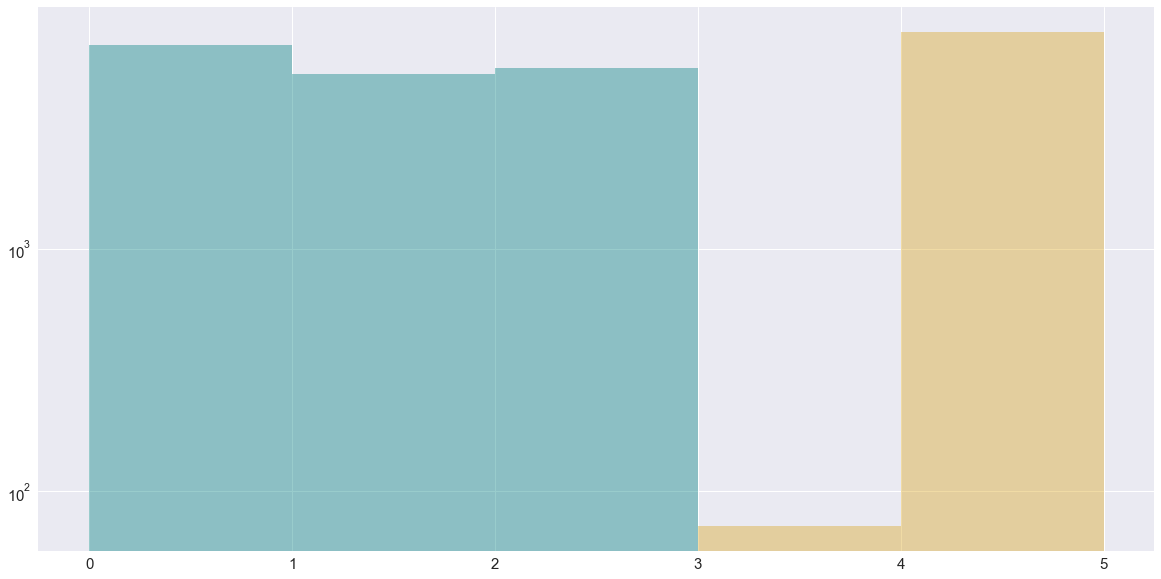

In [100]:
kobe[(kobe_pred7 == 0)].shot_zone_range.hist(bins=np.arange(0,6,1), color = 'teal', alpha = 0.4, log = True)

kobe[(kobe_pred7 == 1)].shot_zone_range.hist(bins=np.arange(0,6,1), 
color = 'goldenrod', alpha = 0.4, log = True)

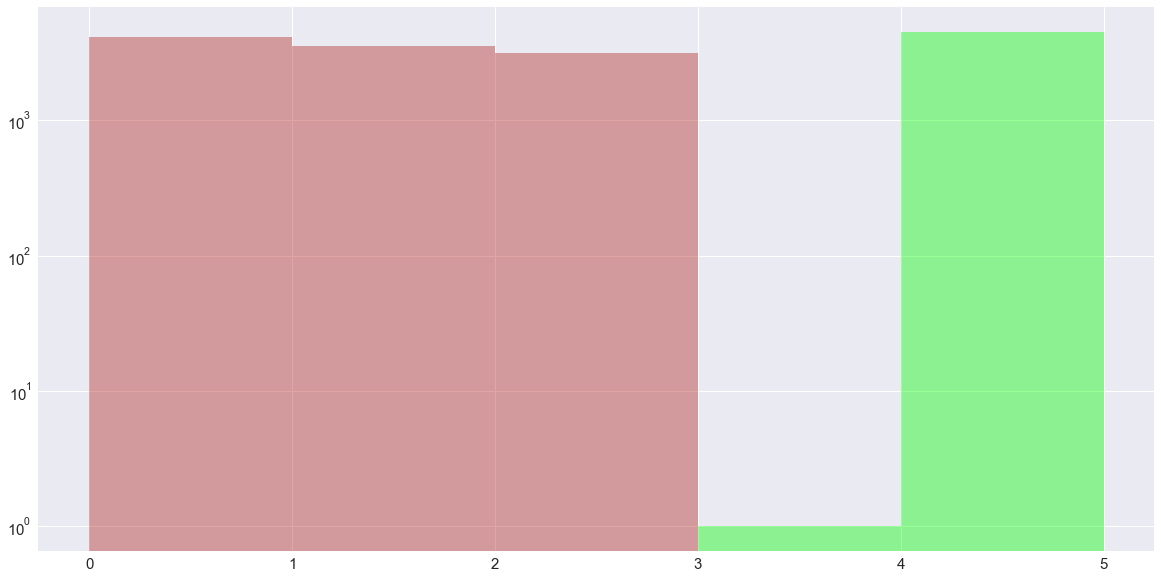

In [101]:
kobe[(kobe_pred7 == 0) & (kobe.shot_made_flag == 0)].shot_zone_range.hist(bins = np.arange(0,6,1), 
color = 'firebrick', alpha = 0.4, log = True)

kobe[(kobe_pred7 == 1) & (kobe.shot_made_flag == 1)].shot_zone_range.hist(bins = np.arange(0,6,1), 
color = 'lime', alpha = 0.4, log = True)

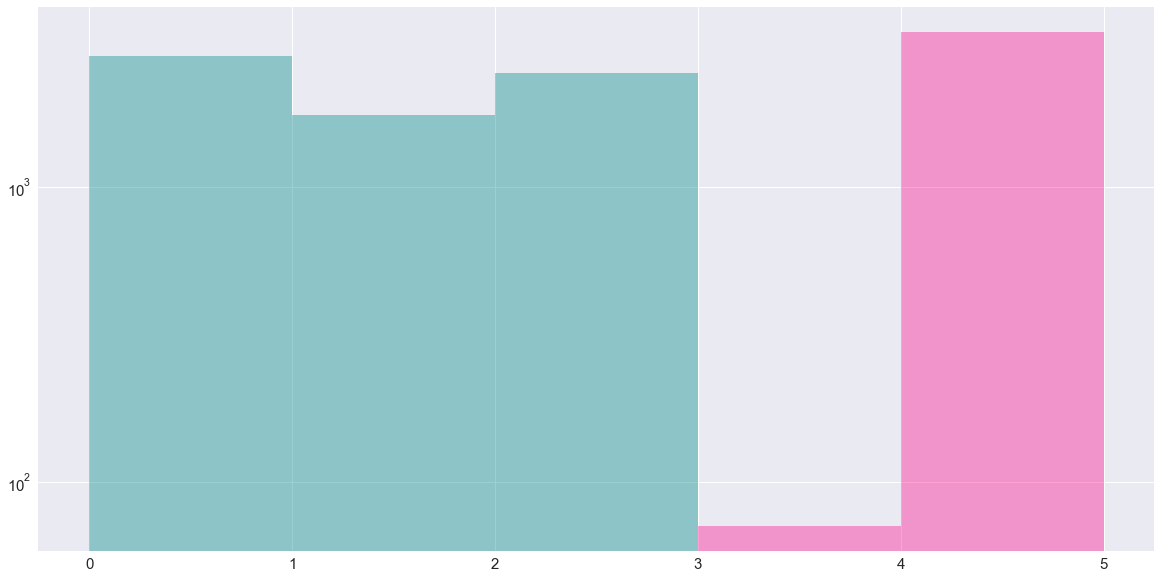

In [102]:
kobe[(kobe_pred7 == 1) & (kobe.shot_made_flag == 0)].shot_zone_range.hist(bins = np.arange(0,6,1), 
color = 'deeppink', alpha = 0.4, log = True)

kobe[(kobe_pred7 == 0) & (kobe.shot_made_flag == 1)].shot_zone_range.hist(bins = np.arange(0,6,1), 
color = 'darkcyan', alpha = 0.4, log = True)

#### `action_type`

In [103]:
kobe.action_type.value_counts()

Jump Shot                          15836
Layup Shot                          2154
Driving Layup Shot                  1628
Turnaround Jump Shot                 891
Fadeaway Jump Shot                   872
Running Jump Shot                    779
Pullup Jump shot                     402
Turnaround Fadeaway shot             366
Slam Dunk Shot                       334
Reverse Layup Shot                   333
Jump Bank Shot                       289
Driving Dunk Shot                    257
Dunk Shot                            217
Tip Shot                             151
Step Back Jump shot                  106
Alley Oop Dunk Shot                   95
Floating Jump shot                    93
Driving Reverse Layup Shot            83
Hook Shot                             73
Driving Finger Roll Shot              68
Alley Oop Layup shot                  67
Reverse Dunk Shot                     61
Driving Finger Roll Layup Shot        59
Turnaround Bank shot                  58
Running Layup Sh

In [104]:
kobe['action_type'] = pd.Categorical(kobe.action_type)

In [105]:
kobe['action_type'] = kobe['action_type'].cat.codes

In [106]:
kobe.action_type.value_counts()

25    15836
26     2154
11     1628
54      891
16      872
40      779
28      402
51      366
46      334
33      333
23      289
4       257
14      217
49      151
47      106
0        95
19       93
12       83
22       73
6        68
1        67
32       61
5        59
50       58
41       51
35       43
13       43
39       33
17       28
15       27
18       26
10       23
24       19
36       18
34       15
9        13
27       11
20       10
30        9
53        8
43        7
2         6
21        5
37        5
38        4
42        3
3         3
29        3
8         3
31        2
48        2
52        2
45        1
7         1
44        1
Name: action_type, dtype: int64

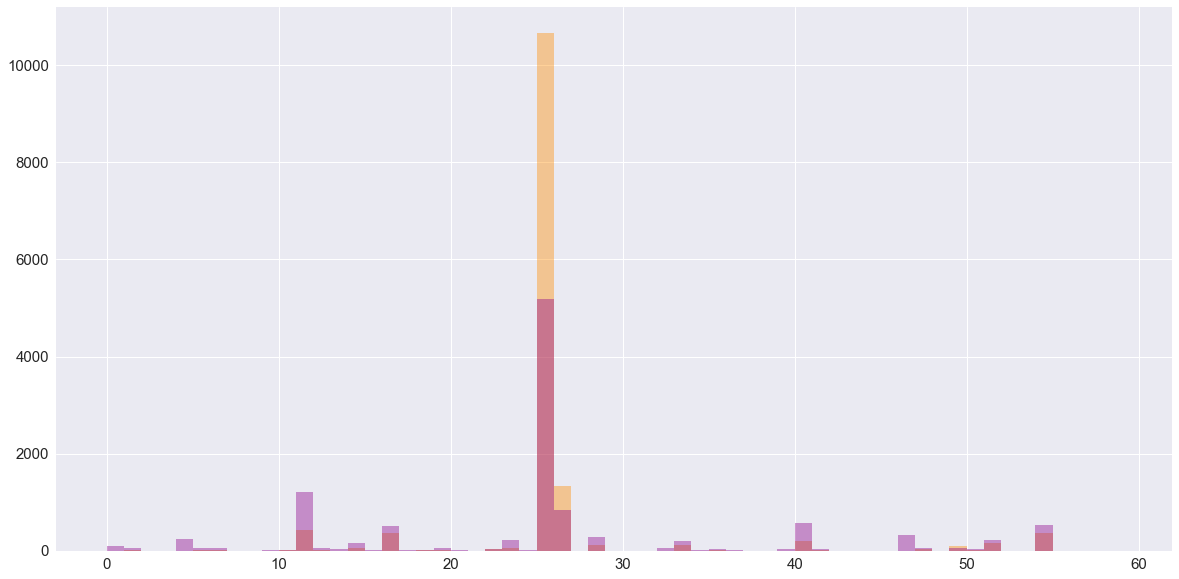

In [107]:
kobe[kobe.shot_made_flag == 0].action_type.hist(bins = np.arange(0,60,1), 
color = 'darkorange', alpha = 0.4)

kobe[kobe.shot_made_flag == 1].action_type.hist(bins = np.arange(0,60,1), 
color = 'darkmagenta',alpha = 0.4)

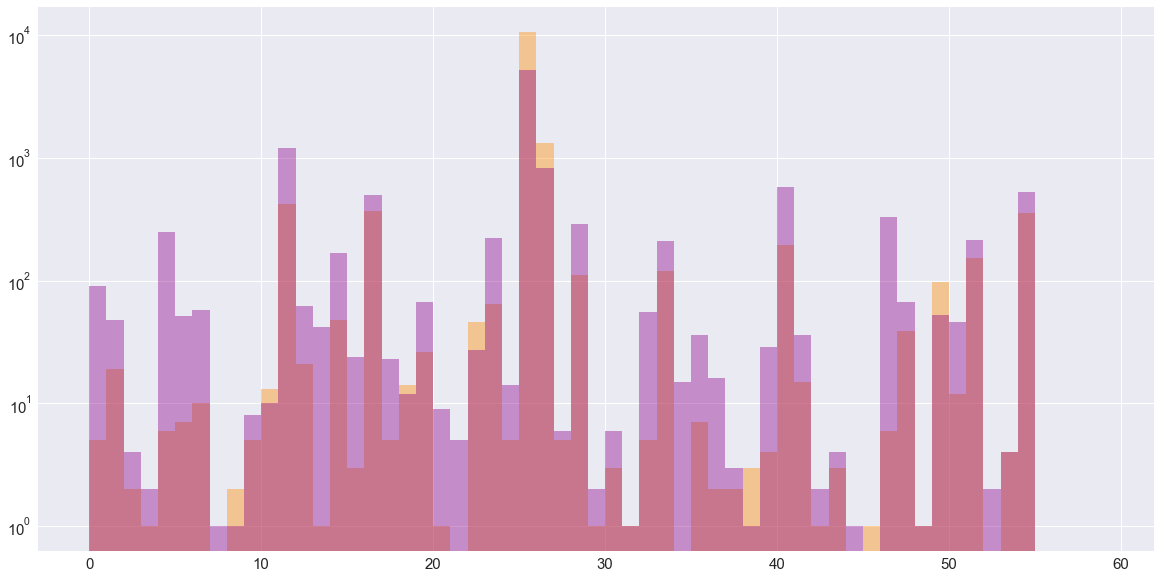

In [108]:
kobe[kobe.shot_made_flag == 0].action_type.hist(bins = np.arange(0,60,1), 
color = 'darkorange', alpha = 0.4, log = True)

kobe[kobe.shot_made_flag == 1].action_type.hist(bins = np.arange(0,60,1), 
color = 'darkmagenta',alpha = 0.4, log = True)

In [109]:
action = ['action_type']
    
X8 = kobe[action]
y = kobe.shot_made_flag

logreg.fit(X8, y)

kobe_pred8 = logreg.predict(X8)

In [110]:
accuracy_score(kobe.shot_made_flag, kobe_pred8.round())

0.5538389695295171

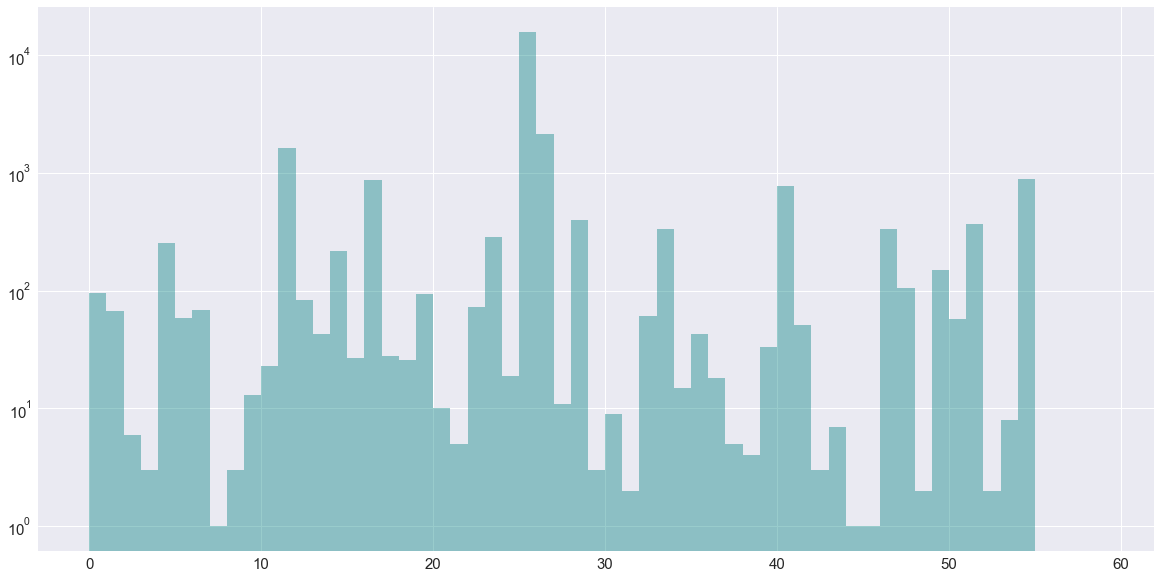

In [111]:
kobe[(kobe_pred8 == 0)].action_type.hist(bins=np.arange(0,60,1), color = 'teal', alpha = 0.4, log = True)

kobe[(kobe_pred8 == 1)].action_type.hist(bins=np.arange(0,60,1), color = 'goldenrod', alpha = 0.4, log = True)

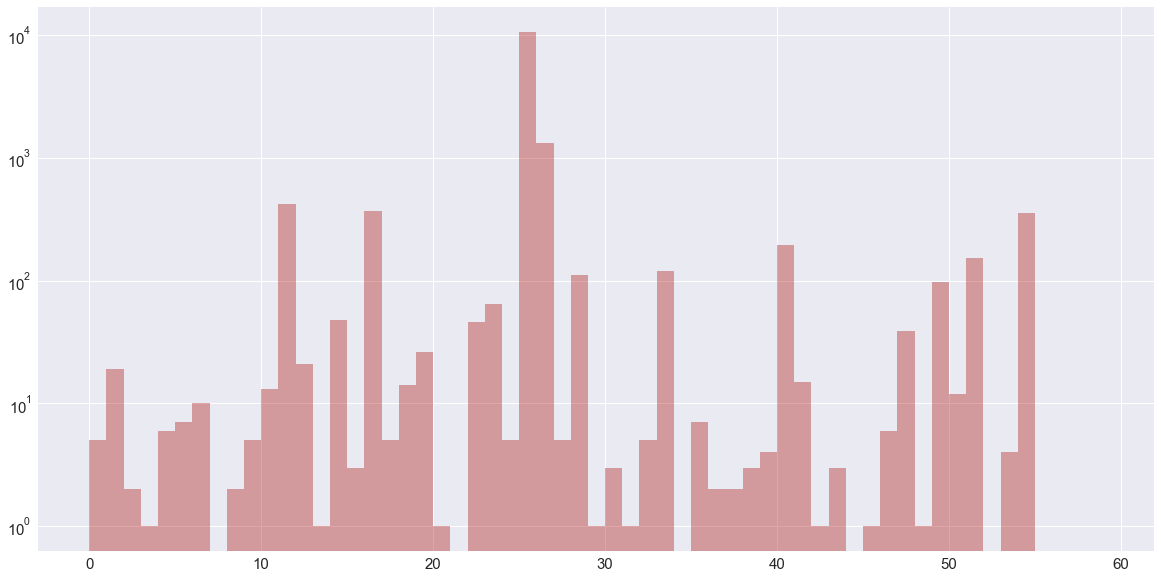

In [112]:
kobe[(kobe_pred8 == 0) & (kobe.shot_made_flag == 0)].action_type.hist(bins = np.arange(0,60,1), 
color = 'firebrick', alpha = 0.4, log = True)

kobe[(kobe_pred8 == 1) & (kobe.shot_made_flag == 1)].action_type.hist(bins = np.arange(0,60,1), 
color = 'lime', alpha = 0.4, log = True)

C:\Users\Anchee\Anaconda3\lib\site-packages\matplotlib\ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


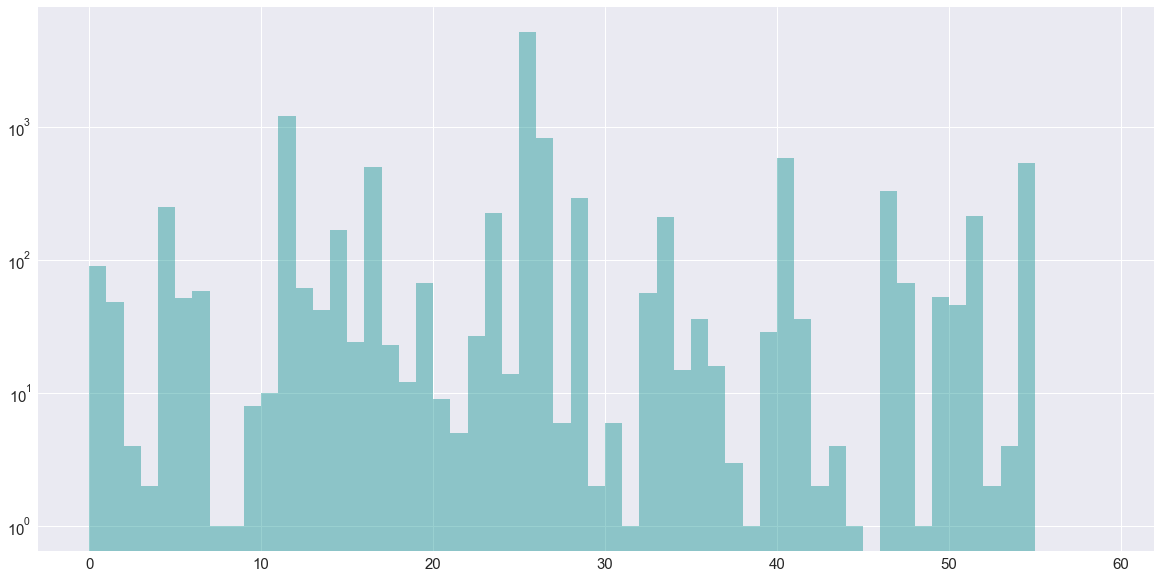

In [113]:
kobe[(kobe_pred8 == 1) & (kobe.shot_made_flag == 0)].action_type.hist(bins = np.arange(0,60,1), 
color = 'deeppink', alpha = 0.4, log = True)

kobe[(kobe_pred8 == 0) & (kobe.shot_made_flag == 1)].action_type.hist(bins = np.arange(0,60,1), 
color = 'darkcyan', alpha = 0.4, log = True)

According to all of the logistic regression above, we can see that `combined_shot_type` can improve the model, because its prediction value is the highest (0.6132622485114994). 

### 3. Show a 3 dimensional surface plot [https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots] of probabilities from a trained Logistic Regression model using only `abs_x` and `loc_y`. The probabilities arise from a distributed grid of `x` values and `y` values as input to the `predict_proba()` function.

In [114]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [145]:
X_3 = kobe[['abs_x', 'loc_y']]
    
y = kobe.shot_made_flag

logreg.fit(X_3, y)

kobe_predict = logreg.predict(X_3)

In [146]:
accuracy_score(kobe.shot_made_flag, kobe_predict.round())

0.5977351441802545

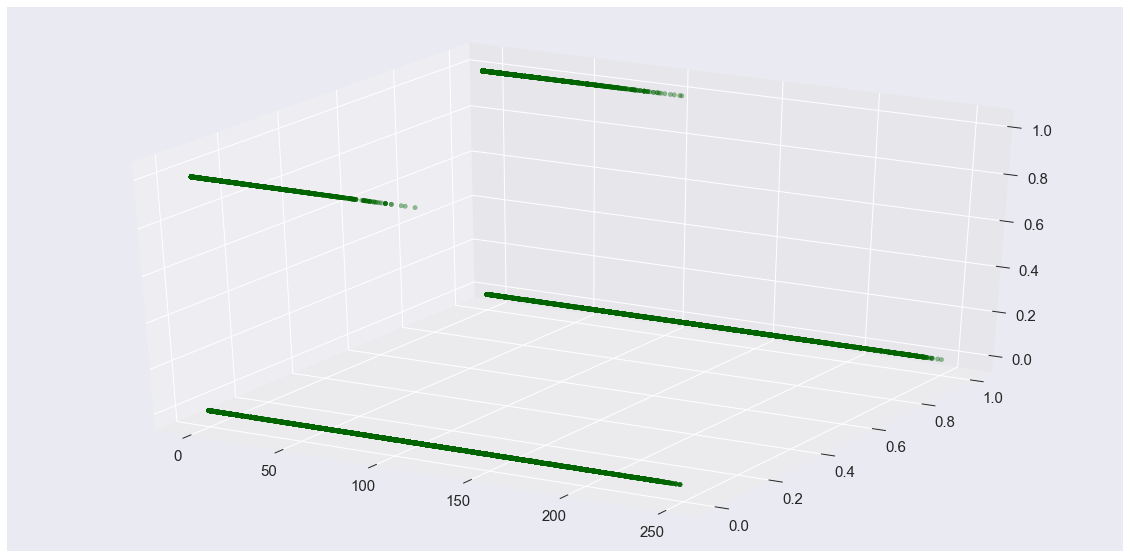

In [188]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(kobe.abs_x, y ,kobe_predict, zdir = 'z', color = 'darkgreen', alpha = 0.4)

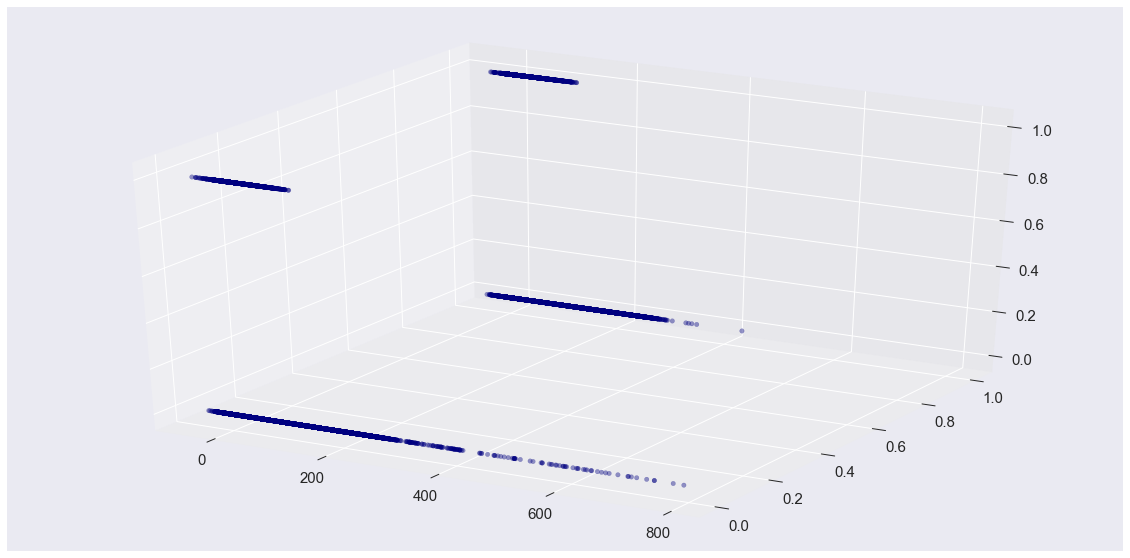

In [191]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(kobe.loc_y, y ,kobe_predict, zdir = 'z', color = 'navy', alpha = 0.4)

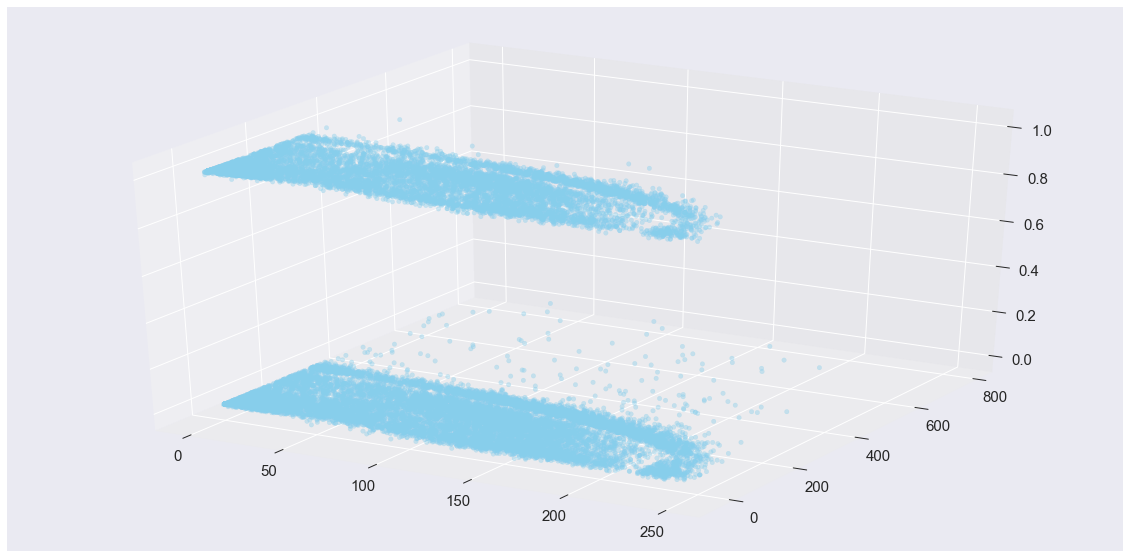

In [192]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(kobe.abs_x, kobe.loc_y , y, zdir = 'z', color = 'skyblue', alpha = 0.4)

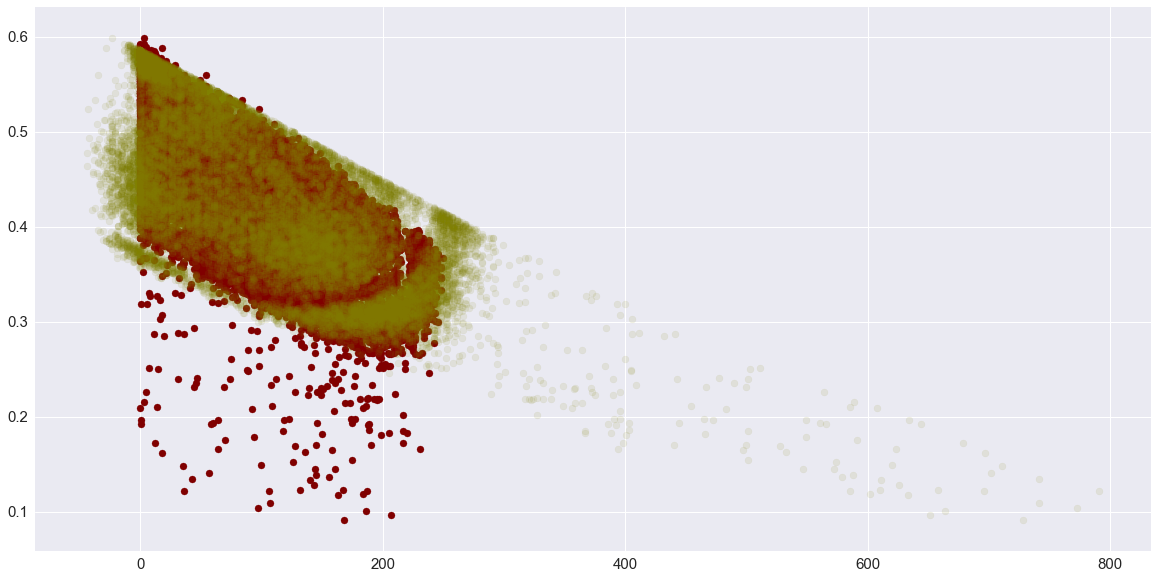

In [176]:
x_trial = np.column_stack((kobe.abs_x, kobe.loc_y))
z = logreg.predict_proba(x_trial)
x3 = plt.scatter(kobe.abs_x, logreg.predict_proba(x_trial)[:,1], color = 'maroon')
x4 = plt.scatter(kobe.loc_y, logreg.predict_proba(x_trial)[:,1], color = 'olive', alpha = 0.1)